In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
from nltk import word_tokenize
import nltk
from html.parser import HTMLParser
from sklearn.feature_extraction.text import TfidfVectorizer
import operator
from IPython.display import display

# Remove duplicates from gendered set

In [2]:
# Load data
data = pd.read_csv('/usr2/mamille2/tumblr/data/halfday_gendered_strict.tsv', sep='\t')
len(data)

1753

In [50]:
data.drop_duplicates(subset=['post_id'], inplace=True)
len(data)

1619

In [51]:
data.to_csv('/usr2/mamille2/tumblr/data/halfday_gendered_strict.tsv', sep='\t', index=False)

# Look at data from each hashtag

In [2]:
# Load data
data = pd.read_csv('/usr2/mamille2/tumblr/data/halfday_gendered_strict.tsv', sep='\t')
len(data)

1753

In [12]:
def split_tags(tags, sep=',', combine_words=False):
    """ Returns list of tags from Tumblr's format or Python list format """
    
    spaced_tags = [tag[1:-1] for tag in tags[1:-1].split(sep)]
    if not combine_words:
        return spaced_tags
    
    else:
        nospace_tags = [tag.replace(' ', '') for tag in spaced_tags]
        return nospace_tags

In [13]:
# Get gender tags
gendertags = [t for tags in data['gender_tags'].map(lambda x: split_tags(x, sep=', ')) for t in tags]
gendertags = set([g.replace(' ', '') for g in gendertags]) # remove spaces
gendertags

{'agender',
 'androgynous',
 'bigender',
 'boy',
 'cisgender',
 'demigender',
 'female',
 'gender',
 'genderfluid',
 'genderidentity',
 'genderneutral',
 'genderqueer',
 'girl',
 'male',
 'man',
 'nb',
 'nonbinary',
 'queer',
 'trans',
 'transgender',
 'woman'}

In [14]:
pd.set_option('display.max_colwidth', 999)

In [53]:
# Examine rows tagged with each gender

view_cols = ['post_title', 'post_id','body', 'post_tags', 'gender_tags', 'tumblog_id', 'source_title', 'source_url', 'reblogged_from_post_id']

for g in sorted(gendertags):
    print(g)
    g_rows = data[data['gender_tags'].map(lambda x: g in split_tags(x, sep=', ', combine_words=True))]
    display(g_rows.iloc[:5,:].loc[:, view_cols])
    print('******************************************************\n')

agender


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
5,Agender Aro/Aces deserve positivity! Three cheers for the three A's!,158087618182,NaN,"{(yay!),(for my asexual ass),(:)),(agender),(asexual),(aromantic)}",['agender'],212038227.0,a-spectrum-positivity,https://a-spectrum-positivity.tumblr.com/post/155335797492/agender-aroaces-deserve-positivity-three-cheers,1.580872e+11
22,reblog if you’re still queer,158100563243,<p>just so everyone gets the memo</p>,"{(lgbt),(pan),(bi),(trans),(gay),(lesbian),(queer),(pansexual),(panromantic),(bisexual),(transgender),(ftm),(mtf),(trans-masc),(trans-fem),(ace),(asexual),(aromantic),(agender),(genderqueer),(genderfluid),(nonbinary)}","['trans', 'queer', 'transgender', 'agender', 'genderqueer', 'genderfluid', 'nonbinary']",243680633.0,NaN,NaN,NaN
80,NaN,158093074583,"<p> So, Day 6 of 31 Days of Trans Visibility says &ldquo;Talk about relationships. Do you have anyone special in your life? Have your relationships been affected by your being trans?&rdquo; and I can honestly say that it doesn&rsquo;t apply to me&hellip; at all. I&rsquo;ve never been in a romantic relationship and my platonic ones are based on a mutual understanding that we&rsquo;re all weird so&hellip; I&rsquo;m going to call this my &lsquo;Cheat Day&rsquo;, since I don&rsquo;t have to write anything for the prompt. <br/></p>","{(31 days of trans visibility),(transgender),(trans visibility month),(trans visibility),(agender),(pride)}","['transgender', 'agender']",39639980.0,NaN,NaN,NaN
86,rip,158097712923,"<p>when you’re agender, your mom’s family are assholes, your dad’s family is chill, and people be misgendering you</p>","{(agender),(nonbinary),(rip)}","['agender', 'nonbinary']",335190130.0,NaN,NaN,NaN
135,"Okay, everyone, help me out.",158091326571,"<p>I&rsquo;m Agender. To put it simply, I was born with a vagina. And I&rsquo;m blonde. And I want a happy trail. I obviously have peach fuzz everywhere, but all I have for a happy trail is 2 black hairs on my belly button. (I&rsquo;m proud of them) and I want a real, floofy happy trail. Not too hairy. Just a little something&hellip; THERE. So&hellip;. If anyone knows how to grow one&hellip; With a certain elixir or something&hellip;. Anything. I want one so bad&hellip;. Dysphoria surrounding it sucks. Someone help!!!!</p>","{(transgender),(happy trail),(agender),(ask),(help!)}","['transgender', 'agender']",234919062.0,NaN,NaN,NaN


******************************************************

androgynous


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
211,"Hi there, pretty thing.",158098314026,"<p>gay girls <a href=""http://ifonlyadream.tumblr.com/ask"" target=""_blank"">Ask Me Anything</a>, ok an everyone else too I guess.</p>","{(ask),(ask me anything),(ask me questions),(girl),(girls only),(female artists),(gay girl),(gay girls),(los angeles),(lesbian),(lesbian blog),(indie),(music),(fashion),(gay girls blog),(new tumblr),(lgbt),(queer),(femme),(femme lesbians),(androgynous),(tomboy)}","['girl', 'queer', 'androgynous']",31033322.0,NaN,NaN,NaN
323,Bath Spell for Transmasculinity:,158089507496,"<p><a href=""http://magicalmeeeee.tumblr.com/post/125123031072/bath-spell-for-transmasculinity"" class=""tumblr_blog"">magicalmeeeee</a>:</p><blockquote> <p>You Will Need:</p> <p>-Sea Salt</p> <p>-Sage</p> <p>-Chamomile</p> <p>-Peppermint</p> <p>-Ginger</p> <p>-White Candle</p> <p>Gather your supplies. While running a hot bath, add your ingredients, focusing on the properties of each. Focus especially on the masculine qualities of chamomile. Light the candle and soak in the water. Meditate on the gender you wish people to perceive. Feel the spell cleansing you of dysphoria and protecting you from the vitriol of cissexism and transphobia. Feel it healing you and drawing in luck, change, and strength. When you are ready, step out of the bath and blow out the candle.</p> </blockquote>","{(bath magic),(book for shadows),(androgynous),(androgyny)}",['androgynous'],329816767.0,magicalmeeeee,http://magicalmeeeee.tumblr.com/post/125123031072/bath-spell-for-transmasculinity,1.580877e+11
407,Shout out to the non-binary lesbians!!,158104356490,"<p><a href=""http://lesbianaffirmations.tumblr.com/post/156595498410/shout-out-to-the-non-binary-lesbians"" class=""tumblr_blog"">lesbianaffirmations</a>:</p><blockquote> <p>Shout out to the genderflux lesbians, the demi girl lesbians, the androgynous lesbians, the trans lesbians, the bigender lesbians, the fluid flux lesbians, the genderfluid lesbians, the gender queer lesbians, the trigender lesbians, the quadgender lesbians, and especially the lesbians who are questioning their gender identity!!</p> <p>You pals are all awesome and amazing and incredibly valid! Keep being fantastic!</p> </blockquote>","{(nonbinary),(lesbian),(genderflux),(demigirl),(androgynous),(trans),(bigender),(fluidflux),(genderfluid),(genderqueer),(trigender),(quadgender),(questioning)}","['nonbinary', 'androgynous', 'trans', 'bigender', 'genderfluid', 'genderqueer']",234437429.0,NaN,NaN,1.565955e+11
734,NaN,158101566137,"<p>Wow&hellip; I didn’t actually think that anybody was going to take notice of this little side blog of mine, but I’m really glad I didn’t give up on it. I was right to think that people like me needed something like this to represent them. </p><p>Androgynous people need positivity, too. Thanks for following me, folks!</p>","{(androgynous),(androgyne),(androgynous positivity),(lgbt+),(gender),(non-binary),(nonbinary)}","['androgynous', 'gender', 'nonbinary']",326036749.0,NaN,NaN,NaN
1219,Is good sex really that hard to fucking come by? Like god damn I just wanna get fucked.,158100585843,NaN,"{(sex),(horny),(single),(queer),(lesbian),(androgynous)}","['queer', 'androgynous']",25297483.0,NaN,NaN,NaN


******************************************************

bigender


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
407,Shout out to the non-binary lesbians!!,158104356490,"<p><a href=""http://lesbianaffirmations.tumblr.com/post/156595498410/shout-out-to-the-non-binary-lesbians"" class=""tumblr_blog"">lesbianaffirmations</a>:</p><blockquote> <p>Shout out to the genderflux lesbians, the demi girl lesbians, the androgynous lesbians, the trans lesbians, the bigender lesbians, the fluid flux lesbians, the genderfluid lesbians, the gender queer lesbians, the trigender lesbians, the quadgender lesbians, and especially the lesbians who are questioning their gender identity!!</p> <p>You pals are all awesome and amazing and incredibly valid! Keep being fantastic!</p> </blockquote>","{(nonbinary),(lesbian),(genderflux),(demigirl),(androgynous),(trans),(bigender),(fluidflux),(genderfluid),(genderqueer),(trigender),(quadgender),(questioning)}","['nonbinary', 'androgynous', 'trans', 'bigender', 'genderfluid', 'genderqueer']",234437429.0,NaN,NaN,1.565955e+11
424,I wanna try to get more active on this blog,158095518713,"<p>So I&rsquo;ll try to post more about where I&rsquo;m at and also just stuff I like. Obviously my main blog gets most my attention but I&rsquo;m not comfortable sharing that haha. Anyway where am I at</p> <p>Basically I don&rsquo;t get &ldquo;masculine&rdquo; or &ldquo;feminine&rdquo; shifts anymore for the most part. They still do happen. But mostly I&rsquo;m comfortable with identifying as or being called as either at any point. I do lean a little more masculine but the feminine side is there too. I still don&rsquo;t like the idea of a gender neutral name so I still have Ethan/Erica and I&rsquo;m fine using he/him or she/her (whichever typically goes with the name you&rsquo;re calling me)</p> <p>So that&rsquo;s a kinda update and if you don&rsquo;t hear from me, send asks reminding me to be active</p>","{(about me),(bigender),(nonbinary)}","['bigender', 'nonbinary']",256097375.0,NaN,NaN,NaN
572,Dysphoria,158090650638,"<p>Someone that’s trans, bigender or gender fluid I can talk to?</p>","{(trans),(LGBTQ),(genderfluid),(bigender),(trasngender)}","['trans', 'genderfluid', 'bigender']",278181936.0,NaN,NaN,NaN
645,//Rant\\,158086321245,"<p>Ok, my English teacher just hung up a human rights flag, a trans flag, and an LGBT+ pride flag, and has already gotten complaints, and I&rsquo;m very mad.</p><p>I&rsquo;m angry, upset, disappointed and scared, just like many people are, but most of all, I&rsquo;m confused. Confused as to what our lifestyle has anything to do with your religion. Confused about why you hate us so much you can&rsquo;t even bear to have our love, our life, our HUMAN RIGHTS illegal. If you don&rsquo;t like it, look away at your own little perfect conservative asshole life. Go ahead, I don&rsquo;t care what you think. But as soon as you protest something as basic as marriage, as using the fucking bathroom, or in the case of our school, THREE FUCKING PEICES OF CLOTH. Three pieces of cloth that bring happiness and a feeling of representation to so many people, but can be easily ignored by others. Thats when I draw the line. That&rsquo;s when I fight back, that&rsquo;s when I&rsquo;ve had enough. And ...","{(lgbt),(lgbtq),(lgbtqia),(gay),(lesbian),(biseuxal),(human rights),(trans),(transgender),(pansexual),(demisexual),(asexual),(polysexual),(gender),(equality),(genderfluid),(transboy),(transgirl),(nonbinary),(homosexuality),(homosexual),(pride),(Pride flag),(Support),(demiboy),(demigirl),(bigender),(agender),(queer),(gender questioning)}","['trans', 'transgender', 'gender', 'genderfluid', 'nonbinary', 'bigender', 'agender', 'queer']",301470053.0,NaN,NaN,NaN


******************************************************

boy


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
46,Witch boy things,158093363410,<p>*Waiting for a lavender flavor condom that feels like a recently charged crystal&hellip; Magical*</p>,"{(boy),(witch),(lavender)}",['boy'],270529735.0,NaN,NaN,NaN
47,O segundo dia,158095207407,"<p>Olá diário, tudo bem? Comigo não está bem. Estou escrevendo exatamente à 1:00h da manhã do dia 07/03/2017.<br/> Hoje era pra ser um dia alegre com muita diversão e amor, mas não foi. Como eu tinha falado ontem, meu namorado tinha combinado de vim aqui pra casa, ou pra casa do @A. Mas adivinha só? Exatamente, ele não veio. Ele simplesmente dormiu a tarde e não veio pra cá. Mais uma vez ele marca algo comigo e ele mesmo fura. Já perdi as contas de quantas vezes ele fez isso. Ele disse que vai vim mais tarde pra cá. Espero que dessa vez ele venha mesmo e nao fique inventando desculpas pra não vim.<br/> Mas tirando isso, o dia foi produtivo. Fiz alguns trabalhos da faculdade, aprendi algumas coisas e estou ajudando o @A a virar streamer e ganhar dinheiro. Ele não trabalha e teve que parar de estudar, então ele meio que está estagnado na vida e isso pode melhorar a auto estima dele. Mais tarde vou na casa dele e espero que ele realmente leve isso a sério. Ele adora se sabotar quando...","{(diary),(dear diary),(diario),(querido diario),(daily),(historia),(history),(mood),(gay),(boy),(gay boy),(confidence),(confiçoes),(confident)}",['boy'],338450625.0,NaN,NaN,NaN
69,me so meh,110270014063,"<p>Our life is a huge amount of water drops in an enormous ocean. One drop –one day, some moments , some tears , someone’s smile or just someone. Every day we wake up thinking that it’s a new day , a new chance , yet the next morning we have<b> </b> the same thoughts. Nothing changes , it’s only the reality that gets messy. Life is all about the mistakes and choices we make , it’s about 3 or 2-letter words – YES or NO. Life is a chaos we are used to call normality, but have you ever asked yourself what is the meaning of “normal”?<br/> Each of us has its own point of view about this , none of them are correct or wrong. It only matters what the majority thinks about it.<br/> Life is inherently messy. Human beings try to rein , to dominate and dictate , which has only brought us incredible suffering over the years<br/> We use to think about ourselves as some little Gods that can decide what is going to happen, who we are going to meet , but we simply can’t control the feeling of lo...","{(love),(text),(words),(messy),(life),(reality),(stupid),(quote),(funny),(drop),(game),(boy),(girl),(feelings),(diamond),(chose),(maryrodideal),(never),(teenager),(meh)}","['boy', 'girl']",74014985.0,NaN,NaN,NaN
95,Someone,158105811716,<p>I met someone ..</p> <p>He&rsquo;s cute ..</p> <p>Weirdly funny ..</p> <p>Green eyes .. Brown hair ..</p> <p>Average human being ..</p> <p>and</p> <p>I killed him ..</p>,"{(dark thoughts),(hi there),(paranoia),(boy),(s),(someone)}",['boy'],286229952.0,NaN,NaN,NaN
148,NaN,158098575310,"<p><a href=""http://peoplegettingreallymadatfood.tumblr.com/post/158097923431"" class=""tumblr_blog"">peoplegettingreallymadatfood</a>:</p><blockquote><figure class=""tmblr-full"" data-orig-height=""270"" data-orig-width=""502""><img src=""https://68.media.tumblr.com/9eef054a75f1132421152b1a625df293/tumblr_inline_omfjcm0H2p1t5w799_540.png"" data-orig-height=""270"" data-orig-width=""502""/></figure></blockquote>","{(boy),(this took like 3 breathes)}",['boy'],48074551.0,peoplegettingreallymadatfood,http://peoplegettingreallymadatfood.tumblr.com/post/158097923431,1.580985e+11


******************************************************

cisgender


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
151,NaN,158099332356,<p>I guess all men aren’t that bad. But what I do know is that <b>cis straight white men</b> are bad. Those losers get offended over everything lmao.</p>,"{(regressive left),(feminism),(feminists),(safe spaces),(safe space),(men),(women),(tumblr),(liberals),(leftists),(conservatives),(cis),(cisgender),(white men),(white people),(straight people),(straight men),(racism),(sexism),(mysoginy),(special snowflakes),(misandry)}",['cisgender'],242769766.0,NaN,NaN,1.576200e+11
672,NaN,158105684054,<p>speak out against injustice even when it doesn&rsquo;t personally affect you.</p>,"{(white privilege),(mansplaining),(male privilege),(cisgender),(lgbtq),(justice),(social justice),(politics),(revolutionary),(anti blackness),(homophobia),(transphobia),(misogyny),(misogynoir),(equality),(human rights),(domestic violence),(sexual abuse),(abuse)}",['cisgender'],29765693.0,NaN,NaN,NaN


******************************************************

demigender


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
162,NaN,158090328219,"<p>Every nonbinary gender, every combination of genders, and any lack of gender is real.</p> <p>Nonbinary people are real.</p> <p>There are no exceptions.</p>","{(just a reminder),(nonbinary erasure),(you are valid),(no exceptions),(nonbinary genders),(agender),(demigender),(and infinitely more)}","['agender', 'demigender']",265297087.0,NaN,NaN,NaN
489,Yo trans ppl!!,158087132304,"<p>I&rsquo;m doing my art folio on trans ppl, esp nb genders, and I work best from reference so if you want to b I my folio!!<br/> pls send me photos of urself (more than just a selfie preferred, like proper photos) where u feel most euphoric w ur name/gender/pronouns/any way u want to be credited. <br/> I&rsquo;m looking for lots of diversity so it doesn&rsquo;t matter race/body type/age (although do make sure images are age appropriate thx) I will let u know if I use ur pic and I will post them later. <br/> if ur cis or can&rsquo;t/don&rsquo;t want to contribute pls boost! Thx ❤</p>","{(shut up elliot),(nonbinary),(genderfluid),(genderqueer),(transgender),(ftm),(ftm transgender),(mtf),(mtf trans),(agender),(demigender)}","['nonbinary', 'genderfluid', 'genderqueer', 'transgender', 'agender', 'demigender']",67559646.0,NaN,NaN,NaN
825,NaN,158094975071,"<p><a href=""https://demigirlhaven.tumblr.com/post/157583132546/demigirls-with-stretch-marks-acne-scars"" class=""tumblr_blog"">demigirlhaven</a>:</p><blockquote><p>demigirls with stretch marks, acne, scars, vitiligo, or eczema are so enchanting!!! you’re not ugly, you are 100% dazzling!</p></blockquote> <p>We need this kind of positivity because self-deprecation is a cool thing to do now when all it really does is hurt our self-esteem and promote self-hatred. Y’all are all amazing no matter what your skin looks like!</p><p>~ mod wren</p>","{(demigender),(demigirl),(positivity),(mod isabella)}",['demigender'],268534567.0,nbhaven,https://nbhaven.tumblr.com/post/157583132546/demigirls-with-stretch-marks-acne-scars,1.576146e+11
1236,NaN,158088338967,"<p><a href=""http://cistrendered.tumblr.com/post/154763734286/demigenders-dont-by-default-mean-99-binary-or"" class=""tumblr_blog"">cistrendered</a>:</p> <blockquote><p>demigenders don’t by default mean “99% binary” or “binary lite”, and it doesn’t HAVE TO mean binary aligned either… it can be a term used by bigender people, trigender people, androgyne people, genderfluid people, and just so many other identities.. and it doesn’t have to mean you need to down-talk other parts of your gender id, and it doesn’t mean you have to always at any time identify with the gender fully. stop over-simplifying non-binary gender identities, and stop treating them like they can’t be fluent, or like they’re just diluted versions of being completely binary. and please stop insisting that some demigender people might as well say they’re cis.</p></blockquote>",{(demigender)},['demigender'],189092674.0,cistrendered,http://cistrendered.tumblr.com/post/154763734286/demigenders-dont-by-default-mean-99-binary-or,1.576768e+11
1462,NaN,145066979045,<p>People need to realize that there’s a difference between straight people and Straight People™</p>,"{(I'm fully aware that not all straight people are assholes Karen),(mod ashley),(lgbt),(lgbtq),(lgbtq+),(gay),(lesbian),(bisexual),(transgender),(queer),(homophobic),(homophobia),(asexual),(aromantic),(pansexual),(generqueer),(nonbinary),(non binary),(non-binary),(demigender)}","['transgender', 'queer', 'nonbinary', 'demigender']",236928294.0,NaN,NaN,NaN


******************************************************

female


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
35,Oppressive? Hardly - my high heels are the most empowering things I own,158081279359,"<noscript><p><figure class=""tmblr-full"" data-orig-height=""810"" data-orig-width=""506"" data-orig-src=""https://68.media.tumblr.com/b955879530ccf18e97b871e35717daff/tumblr_inline_omfz63R0xT1udzwkd_540.jpg""><img src=""https://68.media.tumblr.com/e22f5ef99b37d48fe15ff68cd4f2c682/tumblr_inline_omfz67U5z41tt3bw1_540.jpg"" data-orig-height=""810"" data-orig-width=""506"" data-orig-src=""https://68.media.tumblr.com/b955879530ccf18e97b871e35717daff/tumblr_inline_omfz63R0xT1udzwkd_540.jpg""/></figure></p> </noscript> <span id=""polar-ad-article-top""> </span><p>Why do little girls like to dress up in their <a href=""http://www.telegraph.co.uk/news/2016/09/30/high-heels-dying-out-as-sales-are-overtaken-by-comfy-trainers/"">mummy’s heels</a>? It may have nothing to do with slavishly submitting to the male gaze, I would wager, but rather some kind of inexplicable feeling I still get every time I put on a pair of stupidly high Lanvin stiletto ankle boots.</p> <p>Back then, it was about the excitement of bein...","{(_revsp:the_telegraph_818),(_uuid:e6d790a6-99d9-3f46-935a-04ed2b0e615d),(_author:Christa D&39;Souza),(feminism),(_lmsid:a0Vd000000G6gZREAZ),(_comscoreKey:style_GB_en-GB),(female),(women),(girl power)}",['female'],232931392.0,telegraph.co.uk,http://t.umblr.com/redirect?z=http%3A%2F%2Fwww.telegraph.co.uk%2Fwomen%2Flife%2Foppressive-hardly-high-heels-empowering-things%2F&t=MDg2MDhjMTBkYjlhNTliMjUzNzEyOGQ2OTdjMzBiYjBjZGZlMjc5YiwxNTgwODEyNzkzNTk%3D&b=t%3AeTqaLmW4_c7-yY8Ea1vJjA&p=http%3A%2F%2Fuk.style.yahoo.com%2Fpost%2F158081279359%2Foppressive-hardly-my-high-heels-are-the-most&m=0,1.564898e+11
59,NaN,158101761321,<p>daily reminder that terfs that deny transgender people their identities are valid ^ω^</p>,"{(terf),(terfs),(radfem),(radical feminism),(trans exclusionary radical feminism),(rad-fem),(rad fem),(trans activism),(trans-cult),(transcult),(trans cult),(terf safe),(terf safe space),(radfem safe space),(gender critical),(wombyn),(womyn born womyn),(female),(female positivity),(females only),(pro female),(pro woman),(femalecentric),(profemaleradfem positive),(trans critical)}",['female'],219848537.0,NaN,NaN,NaN
64,Exclusive: Miriam Gonzalez - I don't want my three sons to grow up in a world where girls feel second rate,158104432997,"<noscript><p><figure class=""tmblr-full"" data-orig-height=""303"" data-orig-width=""540"" data-orig-src=""https://68.media.tumblr.com/6f22d15c68e69f53d420ae62f44526bb/tumblr_inline_omg03dnazC1udzwkd_540.jpg""><img src=""https://68.media.tumblr.com/c2451494a9a742e832950ffe46d1baed/tumblr_inline_omg03fl4Kf1tt3bw1_540.jpg"" data-orig-height=""303"" data-orig-width=""540"" data-orig-src=""https://68.media.tumblr.com/6f22d15c68e69f53d420ae62f44526bb/tumblr_inline_omg03dnazC1udzwkd_540.jpg""/></figure></p> </noscript> <span id=""polar-ad-article-top""> </span><p>The last 21 months will be remembered as ones of political turmoil, but also as the moment sexism was given permission to come out from the shadows. In the US, President <a href=""http://www.telegraph.co.uk/news/2016/11/14/planned-parenthood-flooded-with-donations-in-mike-pences-name-af/"">Donald Trump is putting into question women’s reproductive rights</a>; in Russia, laws are being considered to <a href=""http://www.telegraph.co.uk/news/2017/02/...","{(_revsp:the_telegraph_818),(feminism),(_author:Miriam González),(_lmsid:a0Vd000000G6gZREAZ),(_comscoreKey:style_GB_en-GB),(female),(_uuid:6613210e-96b6-337b-869b-e9dc44e382e2),(women),(girl power)}",['female'],232931392.0,telegraph.co.uk,http://t.umblr.com/redirect?z=http%3A%2F%2Fwww.telegraph.co.uk%2Fwomen%2Flife%2Fmiriam-gonzalez-international-womens-day-important-boys-raised%2F&t=ZWEzYTk3NzUyZmRhMGJmNzJhMmEyYzM0ODc3YmE3ZmM3ZWJlMTkzMiwxNTgxMDQ0MzI5OTc%3D&b=t%3AeTqaLmW4_c7-yY8Ea1vJjA&p=http%3A%2F%2Fuk

******************************************************

gender


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
32,NaN,158106254904,"<p><a href=""https://the-ili-rad.tumblr.com/post/158026990432/the-hyper-emotion-of-genderists-is-the-most"" class=""tumblr_blog"">the-ili-rad</a>:</p> <blockquote> <p>the hyper-emotion of genderists is the most difficult thing to deal with, I think. They’ve reached this state where they’ve trained themselves to have such intense reactions to words and ideas that you just can’t talk to them because they’ll work themselves into a frenzy over it.</p> <p>for example, with this “drop the T” thing, they seem to think it means ‘drop the T from existence”, like a call for the extermination of trans people, rather than “being transgender isn’t the same thing as being same-sex-attracted so the issues are different and it would work better for everyone if we separated into more distinct communities that may help each other in the areas where we overlap” (same with feminism).</p> <p>or the other popular one where they think that “your biological sex exists independent of your personal identity” m...","{(genderists),(gender),(gender identity movement),(trans),(trans activism),(transgender)}","['gender', 'trans', 'transgender']",9682879.0,the-ili-rad,https://the-ili-rad.tumblr.com/post/158026990432/the-hyper-emotion-of-genderists-is-the-most,1.581061e+11
38,NaN,158088037154,"<p><a class=""tumblr_blog"" href=""http://undead-trans-lesbian.tumblr.com/post/149375260602"">undead-trans-lesbian</a>:</p><blockquote> <p><a class=""tumblr_blog"" href=""http://my-lesbian-aesthetic.tumblr.com/post/149284827252"">my-lesbian-aesthetic</a>:</p> <blockquote> <p><a class=""tumblr_blog"" href=""http://nonbinarysapphic.tumblr.com/post/146992174403"">nonbinarysapphic</a>:</p> <blockquote> <p>use the right pronouns for people even when they cant hear you<br/></p> </blockquote> <p>Can I point out one exception? Don’t use pronouns when it could out the person. If a trans woman isn’t out to her parents and uses she/her pronouns, don’t use she/her in front of her parents. If you aren’t sure, ask the person. Don’t put trans people in danger </p> </blockquote> <p>I think this is the only time I’ve ever seen someone giving an example of a time you should <i><b>not</b></i> use correct pronouns for someone and agreed with it.</p> </blockquote>",{(gender)},['gender'],326498340.0,nonbinarysapphic,http://nonbinarysapphic.tumblr.com/post/146992174403/use-the-right-pronouns-for-people-even-when-they,1.580820e+11
65,Genderambivalent,158104547125,"<p>Toen ik puber was, was ik ervan overtuigd dat iedereen in een hokje te plaatsen was. </p><p>Hoe eenvoudig zou het zijn. In alle opzichten: als je jezelf in een hokje kan zetten heb je dan ook dadelijk een lijstje met eigenschappen waaraan je voldoet. Weg eeuwige zoektocht naar jezelf. Als je andere mensen in een hokje kan zetten, is het een pak eenvoudiger om mensen te begrijpen. </p><p>Naarmate ik ouder werd begon ik een afkeer te krijgen van hokjes. Man/Vrouw, homo/hetero, goed/slecht, &hellip; Hoe hard we ook ons best doen, de mens zit veel te ingewikkeld in elkaar om uit te kunnen maken welk van de twee tegengestelden je bent. Iedereen zit er wel ergens tussen, al is dit bij de ene al wat meer uitgesproken dan bij de andere. </p><p>in ‘De Morgen’ is er de laatste tijd aandacht voor genderidentiteit. Ze proberen aan het grote publiek duidelijk te maken dat er ook in die materie geen zwart of wit hoeft te zijn. Dat er ontelbare tinten grijs zijn. </p><p>Het heeft me aan het d...","{(dagboek),(gender)}",['gender'],338487357.0,NaN,NaN,NaN
79,NaN,158092669029,"<p><a href=""http://cistrendered.tumblr.com/post/143051494186/like-when-someone-makes-jokes-about-mayonnaise"" class=""tumblr_blog"">cistrendered</a>:</p> <blockquote> <p>Like, when someone makes jokes about mayonnaise being a gender, and people get angry at that, they’re not actually defending “trans mayonnaise people”, they’re criticising you and bei

******************************************************

genderfluid


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
21,NaN,158099768096,<p>I thirst for your tongue<br/> I yearn for your hands<br/> I long for your lips</p> <p>I want you</p>,"{(me),(gay),(lesbian),(genderfluid),(horny),(horny AF),(fuck me pls),(so wet),(this is personal),(oops)}",['genderfluid'],184970532.0,NaN,NaN,NaN
22,reblog if you’re still queer,158100563243,<p>just so everyone gets the memo</p>,"{(lgbt),(pan),(bi),(trans),(gay),(lesbian),(queer),(pansexual),(panromantic),(bisexual),(transgender),(ftm),(mtf),(trans-masc),(trans-fem),(ace),(asexual),(aromantic),(agender),(genderqueer),(genderfluid),(nonbinary)}","['trans', 'queer', 'transgender', 'agender', 'genderqueer', 'genderfluid', 'nonbinary']",243680633.0,NaN,NaN,NaN
29,NaN,158104774446,"<p><a href=""http://letters-to-lgbt-kids.tumblr.com/post/158035033000/my-dear-genderfluid-kids-your-gender-idenity"" class=""tumblr_blog"">letters-to-lgbt-kids</a>:</p><blockquote> <p>My dear genderfluid kids, </p> <p>Your gender idenity deserves to be taken serious. </p> <p><i>You</i> deserve to be taken serious.</p> <p>You’re not any less valid, real, important or wonderful than your trans or nonbinary siblings. </p> <p>You’re not a “watered down” version of lgbt+. You are genderfluid - and that’s great! </p> <p>With all my love, </p> <p>Your Tumblr Mom </p> </blockquote>","{(shoutout),(affirmations),(genderfluid),(nonbinary),(trans),(lgbtqia),(q'd)}","['genderfluid', 'nonbinary', 'trans']",67728905.0,NaN,NaN,1.580350e+11
43,Please reblog if you think that “they/them/theirs” is a valid set of pronouns.,158089477822,<p>actually my pronouns so yes I do lmao</p>,"{(lgbt),(agender witch),(witchcraft),(genderfluid)}",['genderfluid'],317999729.0,theerraticace,http://theerraticace.tumblr.com/post/113436316294/please-reblog-if-you-think-that-theythemtheirs,1.580893e+11
129,I think I’m gender fluid. I’m confused and scared.,158078001189,"<p>Hi all. I’ll be as concise as possible, but this is complicated. About seven months ago I realized that I am pansexual. I came out to my girlfriend. Our relationship had been on thin ice, and this broke it; a few months later, our relationship ended. We had been living together, and I moved out. Where I’ve lived since then has been touch and go: an apartment for two months, my mom’s house for two months, an apartment for one month, etcetera. This sounds like all downside, but there was an upside: I explored my pansexuality. Whooo!</p><p>Fast forward to one-ish month ago. One day, I would wake up, and feel 100% attracted to people who identified as male, and feel 0% attracted to people who identified as female. The next day, I would wake up, and feel 25% attracted to people who identified as male, and feel 75% attracted to people who identified as female. This had never happened before. I had always been 100% attracted to all people.</p><p>I did research online to see if anyone ...","{(gender fluid),(trigger),(trigger warning),(gender identity),(genderfluid)}","['gender identity', 'genderfluid']",338373555.0,NaN,NaN,NaN


******************************************************

genderidentity


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
3,"Hey, if you fit a stereotype about your gender identity or sexuality perfectly, and are very uncomfortable about it, then I’m here to tell you that’s okay! You deserve to express yourself however you want to! The way others perceive you isn’t your fault, and has bearing on them, not you! Did I mention you’re great? Because remember that too!",158086338701,NaN,"{(lgbt+),(stereotypes),(gender identity),(sexuality),(positivity)}",['gender identity'],239610977.0,goodpositivitylgbt,https://goodpositivitylgbt.tumblr.com/post/157712256390/hey-if-you-fit-a-stereotype-about-your-gender,1.578372e+11
82,Supreme Court Decides to Return Gavin Grimm Case to Lower Court,158093536992,"<p><a href=""http://www.therainbowtimesmass.com/supreme-court-decides-return-gavin-grimm-case-lower-court/"" target=""_blank"">Supreme Court Decides to Return Gavin Grimm Case to Lower Court</a></p><blockquote>BOSTON, Mass.—The Supreme Court announced that it is sending Gavin Grimm’s case (G.G. v. Gloucester County School Board) back to the Fourth Circuit Court of Appeals to be reconsidered in light of the Departments of Justice and Education rescinding of a Title IX guidance clarifying protections for transgender students. The ACLU gave the following statement to CNN. “While we’re disappointed that…</blockquote><p><a href=""http://www.therainbowtimesmass.com/supreme-court-decides-return-gavin-grimm-case-lower-court/"" target=""_blank"">View On WordPress</a></p>","{(g.g. v. gloucester county school board),(gavin grimm),(gender identity),(trans youth),(transgender),(transphobia),(u.s. supreme court)}","['gender identity', 'transgender']",13454776.0,NaN,NaN,NaN
129,I think I’m gender fluid. I’m confused and scared.,158078001189,"<p>Hi all. I’ll be as concise as possible, but this is complicated. About seven months ago I realized that I am pansexual. I came out to my girlfriend. Our relationship had been on thin ice, and this broke it; a few months later, our relationship ended. We had been living together, and I moved out. Where I’ve lived since then has been touch and go: an apartment for two months, my mom’s house for two months, an apartment for one month, etcetera. This sounds like all downside, but there was an upside: I explored my pansexuality. Whooo!</p><p>Fast forward to one-ish month ago. One day, I would wake up, and feel 100% attracted to people who identified as male, and feel 0% attracted to people who identified as female. The next day, I would wake up, and feel 25% attracted to people who identified as male, and feel 75% attracted to people who identified as female. This had never happened before. I had always been 100% attracted to all people.</p><p>I did research online to see if anyone ...","{(gender fluid),(trigger),(trigger warning),(gender identity),(genderfluid)}","['gender identity', 'genderfluid']",338373555.0,NaN,NaN,NaN
140,NaN,158095618144,"<p><a href=""https://bordercollie.tumblr.com/post/158011167164/bordercollie-hey-white-people-why-did-you-turn-us"" class=""tumblr_blog"" target=""_blank"">bordercollie</a>:</p> <blockquote> <p><a href=""https://bordercollie.tumblr.com/post/158010916294/hey-white-people-why-did-you-turn-us-hawaiians"" class=""tumblr_blog"" target=""_blank"">bordercollie</a>:</p> <blockquote><h2>hey white people why did you turn us hawai’ian’s third gender “mahu” into an insult thrown at people in the lgbt community? why did you colonize us and make everyone think mahu meant gay? its a hawai’ian gender identity. aikane means gay. mahu is a native-hawai’ian third gender.</h2></blockquote> <p>u can reblog this if u want lmfao</p> </blockquote>","{(gender identity),(hawai'ian),(mahu)}",['gender identity'],41206998.0,bordercollie,https://bordercollie.tumblr.com/post/158010916294/hey-white-people-why-did-you-turn-us-hawaiians,1.580759e+11
326,NaN,158091487785,"<p><a class=""tumblr_blog"" href=""http://acupofteaandmore

******************************************************

genderneutral


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
4,NaN,158086814798,<p>people who are <i>against</i> the inclusion of gender neutral terms are so strange to me.</p><p>especially if they are arguing against it for grammatical reasons.</p><p>language evolves &amp; there is no negative to speaking in gender neutral language.</p>,"{(dear diary),(latinX),(gender neutral)}",['gender neutral'],68218932.0,NaN,NaN,NaN
477,Toxic Gender Roles....,158101421094,"<p>•*•*• 7th March 2017 •*•*•</p> <p>One thing that Squish was struggling with, that ultimately added massively to the stress that caused us to break up, was trying to figure out who he is because he’s always felt he had to be other people’s idea of a “man” to be taken seriously.</p> <p>When it comes down to it, he’s more gender neutral than male, but feels most comfortable presenting male in body and pronouns. However, he is similar to me, in that he doesn’t think much about whether something is masculine or feminine and feels held back by those labels.</p> <p>Even writing this, I have a hard time finding the words to describe him, when it comes to masculine/feminine because neither ever cross my mind unless it’s a topic of conversation or relevant. I mean, I see him as a guy who is kind, caring, genuine, smart, helpful and, unfortunately, confused and struggling. I do think of him as somewhat masculine, but not society’s full on version.</p> <p>One of the reasons we had to b...","{(journal),(TheLifeOfKaiBlog),(TLoKB),(toxic gender roles),(ldr blog),(self discovery),(hope),(society),(break up),(thoughts),(Gender Roles),(just friends),(be nice),(be yourself),(muscles),(don't judge people),(femininity),(masculinity),(makeup),(gender),(gender identity),(gender neutral),(non-binary),(gender non conforming),(toxic)}","['gender', 'gender identity', 'gender neutral']",245259296.0,NaN,NaN,NaN
640,Dinner Plans,158104796302,"<p>Well, here goes my second piece of smut feat. Ignis. </p> <p>Literally like I was writing older!noctis fluff and I saw a pic of gladios dick and the switch in my brain clicked. WELP HERE GOES NOTHING. oh Christ almighty. <a class=""tumblelog"" href=""https://tmblr.co/mufO2Rtn0ggoZpzzTK1fo_Q"">@hypaalicious</a> I have sinned againnnnn!! </p> <p>***</p> <p>You felt Ignis’ gaze latch on to you as you readied yourself for the night. You’ve got yourself in your favorite color, the one that makes your skin glow. It was also his favorite on you and you knew it would entice him. </p> <p>He walked up to you and planted a kiss on in the junction of your neck and shoulder. He smelled delicious and as much as you wanted him to taste him, you two had planned a night out. It surprised you when he asked you if you wanted to go to your favorite restaurant. You bumbled your words and he took it as a yes. He immediately reserved a table for two. That night, you surprised him by taking him in y...","{(ffxv fanfiction),(smut),(nsfw),(ignis scientia),(ignis x reader),(genderneutral),(ffxv),(sweet lord almighty),(gender neutral reader)}",['genderneutral'],18331427.0,NaN,NaN,NaN
1013,This blog supports nonbinary people of colour.,158099513266,NaN,"{(femme),(gender neutral),(:D)}",['gender neutral'],89016061.0,NaN,NaN,1.469762e+11
1139,NB babe looking for some help with affording top surgery!,158094580061,"<p>Wanna donate? Here’s the link!</p><p><a href=""https://gofundme.com/savvystopsurgery"">https://gofundme.com/savvystopsurgery</a> <br/></p><p>Thank you so much! Any questions or comments can be dropped in my ask box.</p>","{(top surgery),(ftm top surgery),(nonbinary top surgery),(ftm),(ftm transition),(nonbinary),(nonbinary transition),(gender non conforming),(enby),(nb),(trans),(transgender),(transitioning),(gender),(genderqueer),(gender identity),(gender neutral),(neutrois),(dysphoria),(gender dysphoria),(euphoria),(gender euphoria),(lgbt),(lgbtq),(lgbtpride),(lgbtaq),(lgbtqia),(please share),(reblog),(help)}","['nonbinary', 'nb'

******************************************************

genderqueer


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
22,reblog if you’re still queer,158100563243,<p>just so everyone gets the memo</p>,"{(lgbt),(pan),(bi),(trans),(gay),(lesbian),(queer),(pansexual),(panromantic),(bisexual),(transgender),(ftm),(mtf),(trans-masc),(trans-fem),(ace),(asexual),(aromantic),(agender),(genderqueer),(genderfluid),(nonbinary)}","['trans', 'queer', 'transgender', 'agender', 'genderqueer', 'genderfluid', 'nonbinary']",243680633.0,NaN,NaN,NaN
191,NaN,158088162868,<p>Just got back from doing the dishes. </p> <p>My head hurts and my eyes are burning. </p> <p>And I think I have a fever.</p>,"{(personal),(genderqueer),(stuck in the closet),(gay)}",['genderqueer'],113486889.0,NaN,NaN,NaN
352,NaN,158087773182,"<p><a class=""tumblr_blog"" href=""http://sourcedumal.tumblr.com/post/143719576641"">sourcedumal</a>:</p> <blockquote> <p><a class=""tumblr_blog"" href=""http://shinykari.tumblr.com/post/74844154855"">shinykari</a>:</p> <blockquote> <p><a class=""tumblr_blog"" href=""http://madmaudlingoes.tumblr.com/post/74842191890"">madmaudlingoes</a>:</p> <blockquote> <p><a class=""tumblr_blog"" href=""http://bropakpro.tumblr.com/post/73964257414"">bropakpro</a>:</p> <blockquote> <p><a class=""tumblr_blog"" href=""http://touch-my-cuboner.tumblr.com/post/73963777988"">touch-my-cuboner</a>:</p> <blockquote> <p><a class=""tumblr_blog"" href=""http://zecretary.tumblr.com/post/72679599440"">zecretary</a>:</p> <blockquote> <p><a class=""tumblr_blog"" href=""http://zecretary.tumblr.com/post/72678144622"">zecretary</a>:</p> <blockquote> <p>the stereotype that women talk more than men is infinitely amusing to me because men are literally incapable of shutting the fuck up</p> </blockquote> <p>i hope this post gets popular enough th...","{(feminism),(feminist),(genderfluid),(genderqueer),(intersectional feminism),(gender),(gender expression),(gender equality),(gender roles)}","['genderfluid', 'genderqueer', 'gender']",321249172.0,lecretary,http://lecretary.tumblr.com/post/72678144622/the-stereotype-that-women-talk-more-than-men-is,1.580877e+11
382,Superhero,158089035417,<p>Does anyone else have a secret superhero version of yourself that you imagine in a detailed and specific alternate universe?? because I do and honestly it&rsquo;s so fun</p>,"{(superhero),(magical girls),(genderfluid),(genderqueer),(intersectional feminism),(lgbtq),(superhero oc),(oc)}","['genderfluid', 'genderqueer']",321249172.0,NaN,NaN,NaN
407,Shout out to the non-binary lesbians!!,158104356490,"<p><a href=""http://lesbianaffirmations.tumblr.com/post/156595498410/shout-out-to-the-non-binary-lesbians"" class=""tumblr_blog"">lesbianaffirmations</a>:</p><blockquote> <p>Shout out to the genderflux lesbians, the demi girl lesbians, the androgynous lesbians, the trans lesbians, the bigender lesbians, the fluid flux lesbians, the genderfluid lesbians, the gender queer lesbians, the trigender lesbians, the quadgender lesbians, and especially the lesbians who are questioning their gender identity!!</p> <p>You pals are all awesome and amazing and incredibly valid! Keep being fantastic!</p> </blockquote>","{(nonbinary),(lesbian),(genderflux),(demigirl),(androgynous),(trans),(bigender),(fluidflux),(genderfluid),(genderqueer),(trigender),(quadgender),(questioning)}","['nonbinary', 'androgynous', 'trans', 'bigender', 'genderfluid', 'genderqueer']",234437429.0,NaN,NaN,1.565955e+11


******************************************************

girl


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
1,hello internet,157779998612,"<p>my name is [gracia] !¡<br/> okayyy, lemme introduce myself;<br/> - i made a new blog bc i had an old one but i forgot my password<br/> - im 14 y/o<br/> - pronouns; she/her<br/> - im from the netherlands<br/> - my english is not very well at all :(<br/> - fav ships; phan, victuuri, minishaw (yea not minizerk xd) &amp;&amp; joshler<br/> - im phan, ari, miniminter &amp;&amp; cole sprouse trash <br/> 🐰🌸✨💐🐻🐰🌸✨💐🐻🐰🌸✨💐🐻<br/> hope y'all enjoy this blog bc im trying to be active!¡ love, gracia</p>","{(lit),(very lit),(hey),(introduce),(post),(kinda first but not first),(facts about me),(facts),(phan),(yay),(girl),(tumblr),(dutch),(wowza),(hello internet),(2017)}",['girl'],330067770.0,NaN,NaN,NaN
14,Looking for porn!!,158096580695,"<p>I’m looking for some good blogs about hardcore porn, bdsm, gloryhole, orgies and extreme sex. Please if you know a good blog just sent me he link o my ask box</p>","{(vagina),(femme),(girl on girl),(lesbo),(fuck),(lesbica),(girl)}",['girl'],315163803.0,NaN,NaN,9.566669e+10
18,NaN,158099660158,"<p>I’m 7 followers away from 300! 😄 I’ll post a lil celebration tomorrow loves <br/> For now, send me asks, I’m bored and a lil horny 😶</p>","{(nsfw),(bored),(yay),(blog),(girl),(letyourslutout),(lesbian),(bi),(bisexual),(slut),(whore),(kik),(snapchat),(skype),(facetime),(porn),(horny),(ask),(message),(me),(boobs),(tits),(ass),(booty),(Dom),(Sub),(Submit),(follow for follow),(Follow me),(Talk to me)}",['girl'],336254431.0,NaN,NaN,NaN
27,hyacinthwilson81 from,158104395498,"<img align=""left"" vspace=""5"" hspace=""10"" src=""http://ift.tt/2hUOgQq""/><a href=""http://ift.tt/2me9g4m"">hyacinthwilson81</a>, Woman from Fort Lauderdale, 40 years","{(black),(ebony),(girl),(date),(dating),(sex),(milf),(cougar),(uk)}",['girl'],233946589.0,NaN,NaN,NaN
33,NaN,157971025449,"<p><a class=""tumblr_blog"" href=""http://becomingathena.tumblr.com/post/115909675280"">becomingathena</a>:</p><blockquote> <p>starting a girl gang of girls aggressively supporting other girls so reblog if you want in because if we get enough people we’re getting jackets <br/></p> </blockquote>","{(support),(girl),(women),(jackets)}",['girl'],257374822.0,tarynnasaurus,http://tarynnasaurus.tumblr.com/post/115909675280/starting-a-girl-gang-of-girls-aggressively,1.527311e+11


******************************************************

male


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
13,I never really post anything,158095921697,<p>But I’m real. I’m a dude and I don’t think they really get much attention on here. Just reblogging what turns me on! I’m here though if anyone’s ever bored</p>,"{(mine),(personal),(male)}",['male'],242184321.0,NaN,NaN,NaN
149,Colorado startup wants to prevent surplus food from ending up at the dump,158098934996,"<p>FoodMaven driver Jessica Underwood delivers hams to The Wild Goose Meeting House in Colorado Springs, Wednesday, March 1, 2017. The Colorado Springs-based startup company is a food broker between food distributors and restaurants to buy and sell surplus food.<br/><a href=""http://www.denverpost.com/2017/03/06/colorado-startup-prevent-food-from-ending-up-at-the-dump/"" rel=""nofollow"" target=""_blank"">[Read More &hellip;]</a></p>","{(strippers),(dancers),(male),(female)}","['male', 'female']",331075013.0,NaN,NaN,NaN
163,Just an experiment. Reblog if you actually give a fuck about male victims of domestic violence and rape.,158091204092,"<p><a class=""tumblr_blog"" href=""http://samurai-ko.tumblr.com/post/139073506581"">samurai-ko</a>:</p><blockquote> <p><a class=""tumblr_blog"" href=""http://loganmcowen.tumblr.com/post/96879894480"">loganmcowen</a>:</p> <blockquote> <p><a class=""tumblr_blog"" href=""http://xaldien.tumblr.com/post/96879838997"">xaldien</a>:</p> <blockquote> <p><a class=""tumblr_blog"" href=""http://loganmcowen.tumblr.com/post/96878671000"">loganmcowen</a>:</p> <blockquote> <p>Of fucking course</p> <p>What sick bastard doesn’t</p> </blockquote> <p>“You’d be surprised”, said Xaldien, who just lost four followers and received a lovely “men can’t be raped” anon shortly after reblogging this the first time.<br/><br/></p> </blockquote> <p>Yowch, disgusting.</p> </blockquote> <p>If I don’t reblog this, assume I’m dead.</p> </blockquote>","{(domestic abuse),(sexual abuse),(male)}",['male'],152222476.0,NaN,NaN,1.579220e+11
231,"In this photo illustration the Social networking site Facebook is displayed on a laptop screen on March 25, 2009 in London, England. A new tool on Facebook allows users to flag stories that they believe to be &quot;disputed.&quot;",158090926691,"<a href=""http://www.nbclosangeles.com/news/tech/Facebook-Rolls-Out-its-Fake-News-Tool-415504343.html"" target=""_blank""><img src=""http://media.nbclosangeles.com/images/213*120/GettyImages-85595143-facebook-generic.jpg"" alt='In this photo illustration the Social networking site Facebook is displayed on a laptop screen on March 25, 2009 in London, England. A new tool on Facebook allows users to flag stories that they believe to be ""disputed.""'/></a><br/>In this photo illustration the Social networking site Facebook is displayed on a laptop screen on March 25, 2009 in London, England. A new tool on Facebook allows users to flag stories that they believe to be &ldquo;disputed.&rdquo;","{(strippers),(dancers),(male),(female)}","['male', 'female']",331061663.0,NaN,NaN,NaN
266,NaN,158095909322,"<p><a href=""http://ohbabycupcakes.tumblr.com/post/158091823542/things-we-have-by-the-end-of-2a-the-wedding"" class=""tumblr_blog"">ohbabycupcakes</a>:</p><blockquote> <p>things we have by the end of 2A:</p> <p>- The Wedding Kiss™<br/> - The Balcony Scene™<br/> - The Sleeping Beauty Kiss™<br/> - The Date™<br/> - The Gift™<br/> - The Balcony Makeout™<br/> - The Face Grab™<br/> - The Hugs™<br/> - The Forehead Touch™<br/> - The I Love You™</p> </blockquote>","{(blessed),(thankful),(male),(shadowhunters),(spoilers),(I'm so dead and so alive rn)}",['male'],99181676.0,ohbabycupcakes,http://ohbabycupcakes.tumblr.com/post/158091823542/things-we-have-by-the-end-of-2a-the-wedding,1.580948e+11


******************************************************

man


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
17,wildhannah69 is currently Live Free Chat,158099303691,"<a href=""http://ift.tt/1uzvwmC"" target=""_blank""><img src=""http://ift.tt/126nAtu"" width=""200"" height=""150"" border=""0"" alt=""""/></a> <br/><br/><a href=""http://ift.tt/1t3Vvon"">Watch Horny Pinays</a><br/><br/><a href=""http://ift.tt/1VwESgz""><img src=""http://ift.tt/1UngYHb""/></a>","{(asian),(pinay),(filipina),(pussy),(ass),(booty),(sex),(horny),(lbfm),(milf),(filipino),(pinoy),(philippines),(angeles),(cebu),(man)}",['man'],252685514.0,NaN,NaN,NaN
20,PinaySexExpert is currently Live Free Chat,158099737106,"<a href=""http://ift.tt/2fBwDFd"" target=""_blank""><img src=""http://ift.tt/2fiu1sc"" width=""200"" height=""150"" border=""0"" alt=""""/></a> <br/><br/><a href=""http://ift.tt/1t3Vvon"">Watch Horny Pinays</a><br/><br/><a href=""http://ift.tt/1VwESgz""><img src=""http://ift.tt/1UngYHb""/></a>","{(asian),(pinay),(filipina),(pussy),(ass),(booty),(sex),(horny),(lbfm),(milf),(filipino),(pinoy),(philippines),(angeles),(cebu),(man)}",['man'],252685514.0,NaN,NaN,NaN
24,pussy4ubitch is currently Live Free Chat,158102160031,"<a href=""http://ift.tt/28LhVV2"" target=""_blank""><img src=""http://ift.tt/28JWtUE"" width=""200"" height=""150"" border=""0"" alt=""""/></a> <br/><br/><a href=""http://ift.tt/1t3Vvon"">Watch Horny Pinays</a><br/><br/><a href=""http://ift.tt/1VwESgz""><img src=""http://ift.tt/1UngYHb""/></a>","{(asian),(pinay),(filipina),(pussy),(ass),(booty),(sex),(horny),(lbfm),(milf),(filipino),(pinoy),(philippines),(angeles),(cebu),(man)}",['man'],252685514.0,NaN,NaN,NaN
26,AsianLovelyTs is currently Live Free Chat,158102981256,"<a href=""http://ift.tt/1IlAeJq"" target=""_blank""><img src=""http://ift.tt/1TvD9Ij"" width=""200"" height=""150"" border=""0"" alt=""""/></a> <br/><br/><a href=""http://ift.tt/1t3Vvon"">Watch Horny Pinays</a><br/><br/><a href=""http://ift.tt/1VwESgz""><img src=""http://ift.tt/1UngYHb""/></a>","{(asian),(pinay),(filipina),(pussy),(ass),(booty),(sex),(horny),(lbfm),(milf),(filipino),(pinoy),(philippines),(angeles),(cebu),(man)}",['man'],252685514.0,NaN,NaN,NaN
28,Xioye is currently Live Free Chat,158104755616,"<a href=""http://ift.tt/2n0rCFX"" target=""_blank""><img src=""http://ift.tt/2lRLTfh"" width=""200"" height=""150"" border=""0"" alt=""""/></a> <br/><br/><a href=""http://ift.tt/1t3Vvon"">Watch Horny Pinays</a><br/><br/><a href=""http://ift.tt/1VwESgz""><img src=""http://ift.tt/1UngYHb""/></a>","{(asian),(pinay),(filipina),(pussy),(ass),(booty),(sex),(horny),(lbfm),(milf),(filipino),(pinoy),(philippines),(angeles),(cebu),(man)}",['man'],252685514.0,NaN,NaN,NaN


******************************************************

nb


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
7,31 days of Trans Visibility,158090816982,"<p> Day 6: Talk about relationships. Do you have anyone special in your life? Have your relationships been affected by your being trans? <br/></p><p>In terms of dating I don’t have anybody ‘special’ right now but I do have an ex who I consider a close friend and we support each other constantly because we both know we’re beautiful &lt;3</p><p>I tend to not seek out relationships that often because of personal preference and because I’m also somewhat scared of rejection. Another reason may be because I did get involved in a relationship that was almost nonconsensual on my part, and I am almost positive that she only dated me because I was trans and she was trying to defy her parents or smth. I don’t know, and I never want to know.</p><p>I haven’t dated much since coming out and I guess I’m glad because I really like the friends that I have in my life rn.</p>","{(31 days of trans visibility),(trans visibility),(trans visibility day 6),(ftm),(transgender),(trans),(he/they),(he/him),(they/them),(personal),(okay to rb),(about me),(nb),(nonbinary)}","['transgender', 'trans', 'nb', 'nonbinary']",214461325.0,NaN,NaN,NaN
104,NaN,158093425471,"<p><a href=""http://killgoku.tumblr.com/post/158089438106/noah-fence-but-i-love-my-boyfriend-and-he-loves-me"" class=""tumblr_blog"">killgoku</a>:</p><blockquote><p>noah fence but I love my boyfriend and he loves me too !!!</p></blockquote>","{(nb),(this is actually v coincidental)}",['nb'],210691111.0,NaN,NaN,1.580894e+11
132,Galactian System URLs,158086969900,"<p>These are some of the urls I saved to prevent them from being taken by the wrong kind of people. If you’re interested in one for your gender identity, message me privately. </p><p>•galactian (aka solstellunarian)<br/></p><p>•solstellunarian (solarian, stellarian, and lunarian)<br/></p><p>•sollunarian <br/></p><p>•solstellarian<br/></p><p>•stelsolarian</p><p>•stellunae (my former blog) <br/></p><p>•stelsolae (alternative abbreviation for stelsolarian/solstelarian) <br/></p><p>•voidarian (alternative form of singularian) <br/></p><p>I have stellunarian (obviously), a friend of mine has singularian, and all the rest have already been taken. </p>","{(nb),(enby),(nonbinary)}","['nb', 'nonbinary']",298233853.0,NaN,NaN,NaN
184,NaN,158105709659,"<p>that feel when u came out as a trans guy to everyone but u feel like u don’t have a gender &amp; u just feel more comfortable being trans-masculine, but u don’t wanna tell ppl bc it’s confusing 4 them and u don’t want to inconvenience them</p>","{(GENDER IS CONFUSING),(ftm),(nb),(my post)}",['nb'],197431846.0,NaN,NaN,NaN
462,NaN,158091955543,"<p><a href=""https://andrewminyardy.tumblr.com/post/157139098563/yall-bisexuals-are-fake-bc-they-usually-end-up"" class=""tumblr_blog"">andrewminyardy</a>:</p><blockquote> <p>y’all: bisexuals are fake bc they usually end up in m/f relationships</p> <p>me, an intellectual: it’s easier and <i>statistically</i> more likely to find a straight person who is attracted to you and compatible with you than to find a lgb+ person who is, especially in small towns. not to mention the fact that a big part of lg community won’t even date us, because they are biphobic. also a huge number of bis are nb, so m/f rhetoric doesn’t even fit us. also. there is nothing wrong with bis being in a m/f relationship if it’s healthy. also. stop being biphobic it’s 2017 when will this stop</p> </blockquote>","{(bi visibility),(bi pride),(nb),(nonbinary)}","['nb', 'nonbinary']",2702902.0,andrewminyardy,https://andrewminyardy.tumblr.com/post/157139098563/yall-bisexuals-are-fake-bc-they-usually-end-up,1.580899e+11


******************************************************

nonbinary


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
7,31 days of Trans Visibility,158090816982,"<p> Day 6: Talk about relationships. Do you have anyone special in your life? Have your relationships been affected by your being trans? <br/></p><p>In terms of dating I don’t have anybody ‘special’ right now but I do have an ex who I consider a close friend and we support each other constantly because we both know we’re beautiful &lt;3</p><p>I tend to not seek out relationships that often because of personal preference and because I’m also somewhat scared of rejection. Another reason may be because I did get involved in a relationship that was almost nonconsensual on my part, and I am almost positive that she only dated me because I was trans and she was trying to defy her parents or smth. I don’t know, and I never want to know.</p><p>I haven’t dated much since coming out and I guess I’m glad because I really like the friends that I have in my life rn.</p>","{(31 days of trans visibility),(trans visibility),(trans visibility day 6),(ftm),(transgender),(trans),(he/they),(he/him),(they/them),(personal),(okay to rb),(about me),(nb),(nonbinary)}","['transgender', 'trans', 'nb', 'nonbinary']",214461325.0,NaN,NaN,NaN
22,reblog if you’re still queer,158100563243,<p>just so everyone gets the memo</p>,"{(lgbt),(pan),(bi),(trans),(gay),(lesbian),(queer),(pansexual),(panromantic),(bisexual),(transgender),(ftm),(mtf),(trans-masc),(trans-fem),(ace),(asexual),(aromantic),(agender),(genderqueer),(genderfluid),(nonbinary)}","['trans', 'queer', 'transgender', 'agender', 'genderqueer', 'genderfluid', 'nonbinary']",243680633.0,NaN,NaN,NaN
29,NaN,158104774446,"<p><a href=""http://letters-to-lgbt-kids.tumblr.com/post/158035033000/my-dear-genderfluid-kids-your-gender-idenity"" class=""tumblr_blog"">letters-to-lgbt-kids</a>:</p><blockquote> <p>My dear genderfluid kids, </p> <p>Your gender idenity deserves to be taken serious. </p> <p><i>You</i> deserve to be taken serious.</p> <p>You’re not any less valid, real, important or wonderful than your trans or nonbinary siblings. </p> <p>You’re not a “watered down” version of lgbt+. You are genderfluid - and that’s great! </p> <p>With all my love, </p> <p>Your Tumblr Mom </p> </blockquote>","{(shoutout),(affirmations),(genderfluid),(nonbinary),(trans),(lgbtqia),(q'd)}","['genderfluid', 'nonbinary', 'trans']",67728905.0,NaN,NaN,1.580350e+11
34,NaN,157984573839,"<p>I’m doing a research survey for my capstone project and need to find participants, it’s about gender expression in avatars and i’m particularly looking for nonbinary respondents! It’s pretty short and personally I think it’s an interesting topic to think about, so if you have time please fill it out and pass it along to other people who may be interested!</p><p><a href=""https://www.esurveycreator.com/s/3a57a55"">https://www.esurveycreator.com/s/3a57a55</a><br/></p>","{(nonbinary),(games)}",['nonbinary'],23198899.0,NaN,NaN,NaN
40,NaN,158088245647,"<p><a href=""https://terfette.tumblr.com/post/158087826172/terfette-actival-terfette-actival"" class=""tumblr_blog"">terfette</a>:</p> <blockquote><p><a href=""http://actival.tumblr.com/post/158087794037/actival-terfette-actival-terfette"" class=""tumblr_blog"">actival</a>:</p> <blockquote><p><a href=""https://terfette.tumblr.com/post/158087720069/actival-terfette-actival-terfette"" class=""tumblr_blog"">terfette</a>:</p> <blockquote><p><a href=""http://actival.tumblr.com/post/158087445662/terfette-actival-terfette-actival"" class=""tumblr_blog"">actival</a>:</p> <blockquote><p><a href=""https://terfette.tumblr.com/post/158087409437/terfette-actival-terfette-cutiepiemime"" class=""tumblr_blog"">terfette</a>:</p> <blockquote><p><a href=""http://actival.tumblr.com/post/158086886242/terfette-actival-terfette-cutiepiemime"" class=""tumblr_blog"">actival</a>:</p> <blockquote><p><a href=""https://terfette.tumblr.com/post/158086852487/terfette-cutiepiemime-terfett

******************************************************

queer


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
0,how to fix irrelevant het romance in movies,133369114810,"<p>either get rid of it completely, or at least make them lesbians. </p>","{(ok to reblog i guess),(honestly),(lgbtq),(queer),(romo /),(pda /),(maybe),(q slur reclaimed in tags),(talk tag)}",['queer'],79742504.0,NaN,NaN,NaN
2,Cis-Queerness: Backing Up The Pronoun,157917665095,"<p>Thanks to a prevalent social movement via the Internet, “social justice” organizations, college campus organizations, and a desire for more progressive thinking, use of gender neutral or gender non-conforming pronouns have become something, not of popularity, but of emergence. While transgender and queer people have, obviously, existed for years, it is becoming more popular within alternative art movements, hardcore punk and emo as an example, to stray away from conventional gender presentation and the use of cis-normative pronouns. I think it is important for me to say that I fully support and am for the use of these pronouns and of breaking down the conventional gender binary. However, while I am for these things, I can’t help but see some futility of the goals of people who utilize gender-neutral pronouns, but are doing nothing to truly present them physically, in style and such aesthetic choices, as other. </p><p>Here is an example. Let us say we have a person named Joe. Jo...","{(culture),(queer),(critique),(transgender)}","['queer', 'transgender']",337664955.0,NaN,NaN,NaN
6,NaN,158088770703,"<p><a href=""http://lupinatic.tumblr.com/post/157766171335/rhodanum-alarajrogers-intersex-ionality"" class=""tumblr_blog"">lupinatic</a>:</p> <blockquote> <p><a href=""http://rhodanum.tumblr.com/post/155716298443/alarajrogers-intersex-ionality-so-im-going"" class=""tumblr_blog"">rhodanum</a>:</p> <blockquote> <p><a href=""http://alarajrogers.tumblr.com/post/155694467659/intersex-ionality-so-im-going-to-be-bitter-and"" class=""tumblr_blog"">alarajrogers</a>:</p> <blockquote> <p><a href=""http://intersex-ionality.tumblr.com/post/155694163834/so-im-going-to-be-bitter-and-old-here-for-a"" class=""tumblr_blog"">intersex-ionality</a>:</p> <blockquote> <p>So I’m going to be bitter and old here for a minute.</p> <p>The absolute refusal to allow anyone to use queer as an umbrella is both novel and regressive (I know, I know). For decades, queer was an accepted and neutral way to concisely refer to a coalition of loosely connected communities and identities. Queer theory, queer film, queer spaces, queer hi...","{(queer),(long post),(History)}",['queer'],52399880.0,intersex-ionality,http://intersex-ionality.tumblr.com/post/155694163834/so-im-going-to-be-bitter-and-old-here-for-a,1.580829e+11
10,NaN,158092388943,<p>With our first kiss I melted and died in your arms and was reborn a better version of myself</p>,"{(love),(queer),(lgtbq),(gay),(girls who like girls),(quote)}",['queer'],191859033.0,NaN,NaN,NaN
12,Why Naruto is a queer issue,158095681812,"<p>I still can’t believe how some people are unable to accept that homosexual subtext does indeed exist in Naruto, and that it is a queer issue. They even go as far as to ignore the romantic elements in SNS. For those who struggle to explain these persons let them show the following prove. (Bear in mind that English is not my mother tongue):</p><p> <b>1) Homosexual Subtext:</b> <a href=""http://tvtropes.org/pmwiki/pmwiki.php/Main/HomoeroticSubtext"">http://tvtropes.org/pmwiki/pmwiki.php/Main/HomoeroticSubtext</a></p><p> “<i>Though romance is important in many works, bonds of friendship between those of the same sex form some of fiction’s most significant relationships. One common method of playing with these close relationships is to portray them similarly to romantic relationships, though the characters may feel nothing sexual for one another. For example, two male friends may </i><a href=""http://tvtropes.org/pmwiki/pmwiki.php/Main/LikeAnOldMarriedCouple""><i>

******************************************************

trans


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
7,31 days of Trans Visibility,158090816982,"<p> Day 6: Talk about relationships. Do you have anyone special in your life? Have your relationships been affected by your being trans? <br/></p><p>In terms of dating I don’t have anybody ‘special’ right now but I do have an ex who I consider a close friend and we support each other constantly because we both know we’re beautiful &lt;3</p><p>I tend to not seek out relationships that often because of personal preference and because I’m also somewhat scared of rejection. Another reason may be because I did get involved in a relationship that was almost nonconsensual on my part, and I am almost positive that she only dated me because I was trans and she was trying to defy her parents or smth. I don’t know, and I never want to know.</p><p>I haven’t dated much since coming out and I guess I’m glad because I really like the friends that I have in my life rn.</p>","{(31 days of trans visibility),(trans visibility),(trans visibility day 6),(ftm),(transgender),(trans),(he/they),(he/him),(they/them),(personal),(okay to rb),(about me),(nb),(nonbinary)}","['transgender', 'trans', 'nb', 'nonbinary']",214461325.0,NaN,NaN,NaN
11,NaN,158094431071,"<p><a href=""http://trans-human-ist.tumblr.com/post/158061075977/trans-mom-precioustranswoman-theres-so-much"" class=""tumblr_blog"">trans-human-ist</a>:</p><blockquote> <p><a href=""http://trans-mom.tumblr.com/post/158056101967/precioustranswoman-theres-so-much-info-about"" class=""tumblr_blog"">trans-mom</a>:</p> <blockquote> <p><a href=""http://precioustranswoman.tumblr.com/post/158055964417/theres-so-much-info-about-tucking-and-gaffs-less"" class=""tumblr_blog"">precioustranswoman</a>:</p> <blockquote> <p>There’s so much info about tucking and gaffs (less so) but to all new trans girls.. just get some cotton panties like boyshorts style and push it back gently.</p> <p> Like you might have to do slightly (slightly) more for tighter clothes or different fabrics but like… ya don’t need to tape yourself every day… or ever… and gaffs are good but unless you’re wearing something tight n thin cotton boyshorts or some other strong underwear will do the trick.</p> <p> Like all this info pretendin...",{(trans)},['trans'],21953364.0,precioustranswoman,http://precioustranswoman.tumblr.com/post/158055964417/theres-so-much-info-about-tucking-and-gaffs-less,1.580891e+11
15,NaN,158097641046,"<p><a href=""http://killbenedictcumberbatch.tumblr.com/post/155262597903/apolionian-raddishcowgirl-apolionian"" class=""tumblr_blog"">killbenedictcumberbatch</a>:</p> <blockquote> <p><a href=""http://apolionian.tumblr.com/post/155255625466/raddishcowgirl-apolionian-its-transphobic"" class=""tumblr_blog"">apolionian</a>:</p> <blockquote> <p><a href=""http://raddishcowgirl.tumblr.com/post/155255107565/apolionian-its-transphobic-to-say-that-trans"" class=""tumblr_blog"">raddishcowgirl</a>:</p> <blockquote> <p><a href=""http://apolionian.tumblr.com/post/155250416831/its-transphobic-to-say-that-trans-women-cant"" class=""tumblr_blog"">apolionian</a>:</p> <blockquote><p>🎉 It’s transphobic to say that trans women can’t be lesbians!! 🎉</p></blockquote> <p>🖤 🖤It’s lesbophobic to say they can be!! 🖤🖤</p> </blockquote> <p>🌸🌸🌸no it’s not!!🌸🌸🌸<br/>🌺🌺🌺trans women are women!!🌺🌺🌺<br/>🌼🌼🌼women can be lesbians!!🌼🌼🌼<br/>💐💐💐I should know, I am a lesbian!!💐💐💐<br/>🌹🌹🌹stop reducing people to their genitalia!!🌹🌹🌹</p...","{(transgender),(lgbtq),(important),(trans),(transphobia),(discrimination)}","['transgender', 'trans']",87105067.0,apolionian,http://apolionian.tumblr.com/post/155250416831/its-transphobic-to-say-that-trans-women-cant,1.580940e+11
19,Snapchat:,158099669995,<p>Fuq666 </p> <p>Someone add me I&rsquo;m bored af constantly</p>,"{(snapchat),(friends),(ftm),(trans),(transguy)}",['trans'],7485306.0,NaN,NaN,NaN
22,reblog if you’re still queer,158100563243,<p>just so everyone gets the memo</p>,

******************************************************

transgender


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
2,Cis-Queerness: Backing Up The Pronoun,157917665095,"<p>Thanks to a prevalent social movement via the Internet, “social justice” organizations, college campus organizations, and a desire for more progressive thinking, use of gender neutral or gender non-conforming pronouns have become something, not of popularity, but of emergence. While transgender and queer people have, obviously, existed for years, it is becoming more popular within alternative art movements, hardcore punk and emo as an example, to stray away from conventional gender presentation and the use of cis-normative pronouns. I think it is important for me to say that I fully support and am for the use of these pronouns and of breaking down the conventional gender binary. However, while I am for these things, I can’t help but see some futility of the goals of people who utilize gender-neutral pronouns, but are doing nothing to truly present them physically, in style and such aesthetic choices, as other. </p><p>Here is an example. Let us say we have a person named Joe. Jo...","{(culture),(queer),(critique),(transgender)}","['queer', 'transgender']",337664955.0,NaN,NaN,NaN
7,31 days of Trans Visibility,158090816982,"<p> Day 6: Talk about relationships. Do you have anyone special in your life? Have your relationships been affected by your being trans? <br/></p><p>In terms of dating I don’t have anybody ‘special’ right now but I do have an ex who I consider a close friend and we support each other constantly because we both know we’re beautiful &lt;3</p><p>I tend to not seek out relationships that often because of personal preference and because I’m also somewhat scared of rejection. Another reason may be because I did get involved in a relationship that was almost nonconsensual on my part, and I am almost positive that she only dated me because I was trans and she was trying to defy her parents or smth. I don’t know, and I never want to know.</p><p>I haven’t dated much since coming out and I guess I’m glad because I really like the friends that I have in my life rn.</p>","{(31 days of trans visibility),(trans visibility),(trans visibility day 6),(ftm),(transgender),(trans),(he/they),(he/him),(they/them),(personal),(okay to rb),(about me),(nb),(nonbinary)}","['transgender', 'trans', 'nb', 'nonbinary']",214461325.0,NaN,NaN,NaN
8,NaN,158091375387,"<p><a href=""https://myowndeliverance.tumblr.com/post/158026960379/to-any-trans-women-and-transfeminine-followers-of"" class=""tumblr_blog"">myowndeliverance</a>:</p> <blockquote> <p>To any trans women and transfeminine followers of mine, did you know there’s <a href=""https://www.etsy.com/shop/LeoLines?ref=l2-shop-info-name"">a pretty huge Etsy store</a> which does gaff underwear and swimsuits specifically designed for trans people amongst its products? They go in a pretty decent range of sizes, including sizes for young girls, and while I do not personally know anyone who has used them, there’s a fuckton of positive reviews on the Etsy store. They have a ton of colours to choose from, different fabric choices, the <i>works</i>.</p> <figure data-orig-width=""500"" data-orig-height=""500"" class=""tmblr-full""><img src=""https://68.media.tumblr.com/6fd5430c33664b886d220f74b03741bf/tumblr_inline_omcmouveg21rqbbiy_540.jpg"" alt=""image"" data-orig-width=""500"" data-orig-height=""500""/></figure><p>And...",{(transgender)},['transgender'],83881722.0,myowndeliverance,https://myowndeliverance.tumblr.com/post/158026960379/to-any-trans-women-and-transfeminine-followers-of,1.580905e+11
9,NaN,158091873757,"<p>Me: yeah, i have some mental health issues Person: It’s okay, I’ve had friends with depression/anxiety- I can handle it!! Me, internally: </p> <p><figure class=""tmblr-full"" data-orig-width=""500"" data-orig-height=""721"" data-tumblr-attribution=""cumulonimbus93:tIkyEqeYL4kOoZ4Z8WWtMA:Z24Ust22pFUmd"" data-orig-src=""http://68

******************************************************

woman


,post_title,post_id,body,post_tags,gender_tags,tumblog_id,source_title,source_url,reblogged_from_post_id
53,zsa_ecaldre from,158098846427,"<img align=""left"" vspace=""5"" hspace=""10"" src=""http://galcdn.datingfactory.net/gallery/299307873/thumbnail335e4b27a430ae44ad548329a33f1e77.png""/><a href=""http://hotasiangirls.datingbuddies.com/registration/?refId=&amp;referUser=299307873&amp;rnd=54eb9d7a675155b0689e09f7783853fc"">zsa_ecaldre</a>, Woman from Mauban, 26 years","{(philippines),(date),(dating),(asian),(girl),(woman),(sex),(sexy)}","['girl', 'woman']",301962325.0,NaN,NaN,NaN
55,Nigerian Woman Murdered And Mutilated After Refusing To Have Sex With Her Boyfriend,158099147049,"<p><a href=""http://knowledgefree.info/blog/2017/03/07/nigerian-woman-murdered-and-mutilated-after-refusing-to-have-sex-with-her-boyfriend/"">Nigerian Woman Murdered And Mutilated After Refusing To Have Sex With Her Boyfriend</a></p><img width=""300"" height=""158"" style=""float: right; padding:10px;"" src=""http://knowledgefree.info/wp-content/uploads/2017/03/nigerian-woman-murdered-and-mutilated-after-refusing-to-have-sex-with-her-boyfriend.png?w=300"" class=""attachment-medium size-medium wp-post-image"" alt="""" data-attachment-id=""22411"" data-permalink=""http://knowledgefree.info/?attachment_id=22411"" data-orig-file=""http://knowledgefree.info/wp-content/uploads/2017/03/nigerian-woman-murdered-and-mutilated-after-refusing-to-have-sex-with-her-boyfriend.png"" data-orig-size=""800,420"" data-comments-opened=""1"" data-image-meta='{""aperture"":""0"",""credit"":"""",""camera"":"""",""caption"":"""",""created_timestamp"":""0"",""copyright"":"""",""focal_length"":""0"",""iso"":""0"",""shutter_speed"":""0"",""title"":"""",""orientation"":""0""}...","{(after),(boyfriend),(murdered),(mutilated),(nigerian),(refusing),(woman)}",['woman'],308069243.0,NaN,NaN,NaN
63,Sweetmel from,158104377872,"<img align=""left"" vspace=""5"" hspace=""10"" src=""http://galcdn.datingfactory.net/gallery/2086856997/thumbnailbaa5192d87434f8660cd3fadeb75b6f6.png""/><a href=""http://hotasiangirls.datingbuddies.com/registration/?refId=&amp;referUser=2086856997&amp;rnd=267e1752f8d371745b82904a8239cf58"">Sweetmel</a>, Woman from Lanao, 41 years","{(philippines),(date),(dating),(asian),(girl),(woman),(sex),(sexy)}","['girl', 'woman']",301962325.0,NaN,NaN,NaN
76,NaN,158090775268,<p>I found out the truth today. wasn&rsquo;t good news I wanted to hear. But it was the truth and I nothing but the truth. I realized that the person you loved and trusted the most at that time lied completely straight to my face. Even when I asked many times he still lied and lied and lied. When you find out that the other person you left behind and cared for and loved you more and had so many memories with wasn&rsquo;t lying and to throw that all away and to think to yourself how stupid you are for trusting the wrong people. How you just want to disappear from the world and how you could of been so dumb for this to be happening right now is unbelievable stupid of me. I&rsquo;m sorry for everything.</p>,"{(truth),(story),(short stories),(lied),(lie),(ancient greek and roman coins www.truste),(artists on tumbr),(attached),(black and white),(art),(architecture),(advertising),(depressing quotes),(queue),(quotes),(queer),(quoteoftheday),(queen),(made with tumblr),(walking),(words),(woman),(women's fashion),(winter),(wife),(explore),(edit),(ebony),(eyes)}","['queer', 'woman']",237790063.0,NaN,NaN,NaN
87,Zhel Han from,158098850747,"<img align=""left"" vspace=""5"" hspace=""10"" src=""http://galcdn.datingfactory.net/gallery/1178156886/thumbnailec52a927dfb155e0ffa95a56a7faadf4.png""/><a href=""http://hotasiangirls.datingbuddies.com/registration/?refId=&amp;referUser=1178156886&amp;rnd=d64161a029e0a771f8491f74c6877ee4"">Zhel Han</a>, Woman from Dipolog, 20 years","{(philippines),(date),(dating),(asian),(girl),(woman),(sex),(sexy)}","['girl', 'woman']",301962325.0,NaN,NaN,NaN


******************************************************



In [22]:
g_rows.columns

Index(['post_id', 'activity_time_epoch', 'tumblog_id', 'post_title',
       'post_short_url', 'post_type', 'post_caption', 'post_format',
       'post_note_count', 'created_time_epoch', 'updated_time_epoch',
       'is_submission', 'source_title', 'source_url', 'post_classifier',
       'blog_classifier', 'accepts_answers', 'reblogged_from_post_id',
       'reblogged_from_metadata', 'root_post_id', 'body', 'mentions',
       'post_tags', 'gender_tags'],
      dtype='object')

In [31]:
g_rows.iloc[:5].loc[:,['post_id', 'tumblog_id', 'source_title', 'source_url', 'reblogged_from_post_id']]

,post_id,tumblog_id,source_title,source_url,reblogged_from_post_id
211,158098314026,31033322.0,NaN,NaN,NaN
212,158098314026,31033322.0,NaN,NaN,NaN
323,158089507496,329816767.0,magicalmeeeee,http://magicalmeeeee.tumblr.com/post/125123031072/bath-spell-for-transmasculinity,1.580877e+11
368,158098314026,31033322.0,NaN,NaN,NaN
407,158104356490,234437429.0,NaN,NaN,1.565955e+11


# Unigram features for ea gender hashtag

In [58]:
gender_ctr = Counter(gendertags)
gender_ctr.keys()

dict_keys(['demigender', 'boy', 'genderneutral', 'trans', 'nonbinary', 'genderqueer', 'agender', 'male', 'transgender', 'gender', 'queer', 'cisgender', 'bigender', 'man', 'genderfluid', 'female', 'androgynous', 'girl', 'woman', 'nb', 'genderidentity'])

In [60]:
# Strip HTML
class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

In [61]:
# See word distributions for ea gender hashtag

g_text = {}
genders = sorted(gendertags)

for g in sorted(genders):
    g_rows = data[data['gender_tags'].map(lambda x: g in split_tags(x, sep=', ', combine_words=True))]
    
    g_text[g] = ' '.join([strip_tags(doc) for doc in g_rows['body'] if isinstance(doc, str)]).lower()
    
    # Tokenize, lowercase

#     for doc in g_rows['body'].values:
#         if isinstance(doc, str):
#             g_toks += word_tokenize(strip_tags(doc).lower())

    print(len(g_rows))

33
6
4
53
2
5
53
147
28
17
6
17
235
19
265
18
113
200
417
263
123


In [123]:
stops = nltk.corpus.stopwords.words('english')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [62]:
# See highly weighted tf-idf words

genlabels, genvals = zip(*g_text.items())

toks = [word_tokenize(doc) for doc in g_text.values()]
alltoks = Counter([wd for doc_toks in toks for wd in doc_toks])

for i,g in enumerate(toks):
    
    wts = {}
    doc_toks = Counter(g)
    
    for wd in doc_toks:
        tf = doc_toks[wd]
        if tf < 2:
            wts[wd] = 0
        else:
            wts[wd] = tf/alltoks[wd]
        
    print(genlabels[i])
#     print(sorted(wts.items(), key=wts.get, reverse=True)[:20])
    print(sorted(wts.items(), key=operator.itemgetter(1), reverse=True)[:20])
    print()

agender
[('8th', 0.6666666666666666), ('something…', 0.5), ('trail', 0.42857142857142855), ('gendervoid', 0.3), ('so…', 0.2857142857142857), ("'complete’", 0.25), ('calls', 0.25), ('transness', 0.2222222222222222), ('mutual', 0.2), ('women”', 0.2), ('affected', 0.16666666666666666), ('“a', 0.16666666666666666), ('moms', 0.15384615384615385), ('sucks', 0.14285714285714285), ('folio', 0.14285714285714285), ('thx', 0.14285714285714285), ('sees', 0.125), ('“', 0.125), ('reference', 0.125), ('affect', 0.125)]

androgynous
[('candle', 0.3333333333333333), ('bath', 0.2857142857142857), ('lesbians', 0.07432432432432433), ('androgynous', 0.06666666666666667), ('especially', 0.02), ('didn’t', 0.011428571428571429), ('too', 0.006535947712418301), ('!', 0.0045871559633027525), ('feel', 0.0042643923240938165), ('need', 0.004201680672268907), ('think', 0.00411522633744856), ('gender', 0.002976190476190476), ('out', 0.0029354207436399216), ('me', 0.002170767004341534), ('on', 0.0021175224986765486), 

[('frances', 1.0), ('testify', 1.0), ('congressional', 1.0), ('riot', 1.0), ('lucy', 1.0), ('marsha', 1.0), ('1969', 1.0), ('s.t.a.r', 1.0), ('sylvia', 1.0), ('non-discrimination', 1.0), ('2002', 1.0), ('diego', 1.0), ('2003', 1.0), ('hirosama', 1.0), ('elected', 1.0), ('trudie', 1.0), ('sanchez', 1.0), ('2008', 1.0), ('broadas', 1.0), ('blake', 1.0)]

woman
[('heelsland', 1.0), ('heels-land.com', 1.0), ('talons', 1.0), ('lesbianpink.us', 1.0), ('música', 1.0), ('donde', 1.0), ('con', 1.0), ('su', 1.0), ('álbum', 1.0), ('misoginia', 1.0), ('nació', 1.0), ('relación', 1.0), ('tiempo', 1.0), ('centro', 1.0), ('entre', 1.0), ('varias', 1.0), ('libre', 1.0), ('desde', 1.0), ('canciones', 1.0), ('cuando', 1.0)]



In [75]:
data.columns

Index(['post_id', 'activity_time_epoch', 'tumblog_id', 'post_title',
       'post_short_url', 'post_type', 'post_caption', 'post_format',
       'post_note_count', 'created_time_epoch', 'updated_time_epoch',
       'is_submission', 'source_title', 'source_url', 'post_classifier',
       'blog_classifier', 'accepts_answers', 'reblogged_from_post_id',
       'reblogged_from_metadata', 'root_post_id', 'body', 'mentions',
       'post_tags', 'gender_tags'],
      dtype='object')

# Plot gender hashtags

In [77]:
data['body']

0       <p>either get rid of it completely, or at leas...
1       <p>my name is [gracia] !¡<br/> okayyy, lemme i...
2       <p>Thanks to a prevalent social movement via t...
3                                                     NaN
4       <p>people who are <i>against</i> the inclusion...
5                                                     NaN
6       <p><a href="http://lupinatic.tumblr.com/post/1...
7       <p>  Day 6: Talk about relationships. Do you h...
8       <p><a href="https://myowndeliverance.tumblr.co...
9       <p>Me: yeah, i have some mental health issues ...
10      <p>With our first kiss I melted and died in yo...
11      <p><a href="http://trans-human-ist.tumblr.com/...
12      <p>I still can’t believe how some people are u...
13      <p>But I’m real. I’m a dude and I don’t think ...
14      <p>I’m looking for some good blogs about hardc...
15      <p><a href="http://killbenedictcumberbatch.tum...
16      <p>When you&rsquo;re going out tomorrow night ...
17      <a hre

In [2]:
# Load data
data = pd.read_csv('/usr2/mamille2/tumblr/data/halfday_gendered_strict.tsv', sep='\t')
len(data)

1753

In [62]:
# Count genders
gendertags = [t for tags in data['gender_tags'].map(lambda x: x[1:-1].split(', ')) for t in tags]
gendertags = [g.replace(' ', '') for g in gendertags] # remove spaces
len(gendertags)

2213

In [55]:
gender_ctr = Counter(gendertags)

In [66]:
gender_ctr.most_common()

[("'trans'", 435),
 ("'transgender'", 285),
 ("'man'", 266),
 ("'girl'", 259),
 ("'queer'", 221),
 ("'gender'", 172),
 ("'woman'", 132),
 ("'nonbinary'", 131),
 ("'female'", 62),
 ("'boy'", 60),
 ("'agender'", 39),
 ("'genderfluid'", 32),
 ("'nb'", 26),
 ("'genderidentity'", 22),
 ("'male'", 19),
 ("'genderqueer'", 19),
 ("'genderneutral'", 12),
 ("'androgynous'", 9),
 ("'demigender'", 6),
 ("'bigender'", 4),
 ("'cisgender'", 2)]

In [67]:
labels, values = zip(*gender_ctr.most_common())
labels = [l[1:-1] for l in labels]
print(labels)
print(values)

['trans', 'transgender', 'man', 'girl', 'queer', 'gender', 'woman', 'nonbinary', 'female', 'boy', 'agender', 'genderfluid', 'nb', 'genderidentity', 'male', 'genderqueer', 'genderneutral', 'androgynous', 'demigender', 'bigender', 'cisgender']
(435, 285, 266, 259, 221, 172, 132, 131, 62, 60, 39, 32, 26, 22, 19, 19, 12, 9, 6, 4, 2)


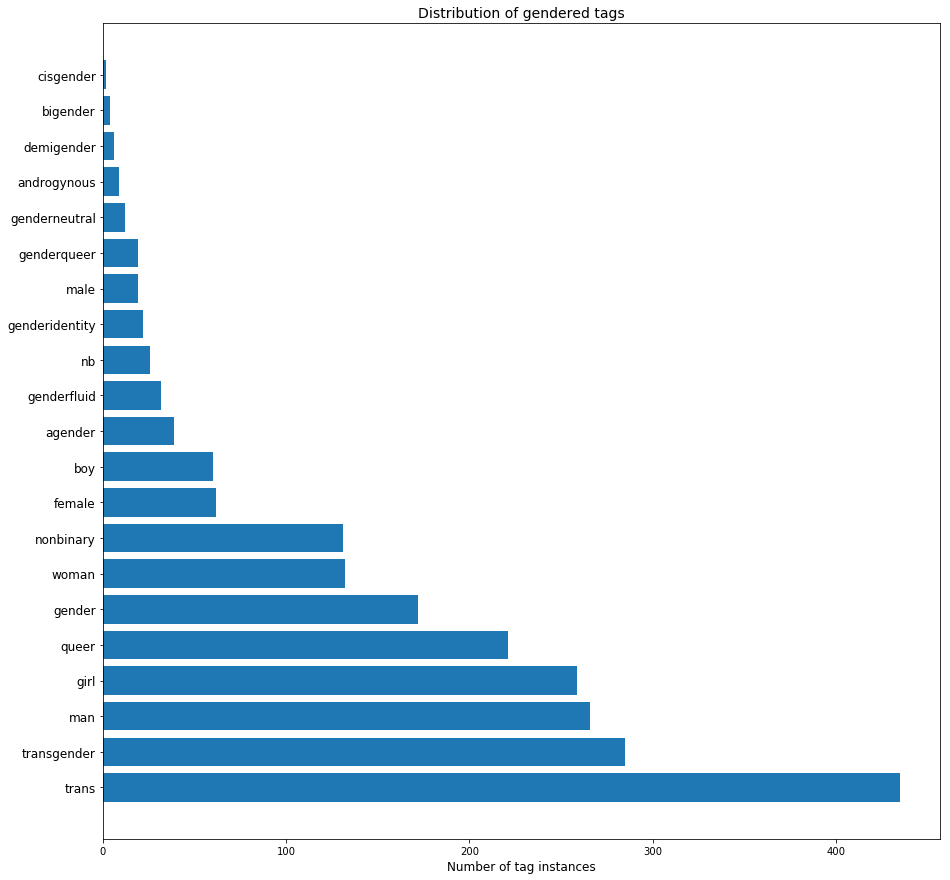

In [73]:
%matplotlib inline

# Histogram of genders
indices = np.arange(len(labels))
# width = 1 # width of bar
plt.figure(figsize=(15,15))
plt.barh(indices, values, align='center')
plt.yticks(indices, labels, fontsize=12)
plt.xlabel('Number of tag instances', fontsize=12)
plt.title('Distribution of gendered tags', fontsize=14)
plt.savefig('/usr2/mamille2/tumblr/gender_tags.png', dpi=100)
plt.show()

In [16]:
len(gender_ctr)

22

# Extract text posts with gender hashtags

In [21]:
gendered_keywords = [
                'female',
                'male',
                'man',
                'woman',
                'girl',
                'boy',
                'trans',
                'transgender',
                'cisgender',
                'nb',
                'nonbinary',
                'third gender',
                'thirdgender',
                'gender',
                'gender identity',
                'androgynous',
                'agender',
                'ambigender',
                'bigender',
                'boyflux',
                'girlflux',
                'demigender',
                'demifluid',
                'femfluid',
                'genderfluid',
                'gender neutral',
                'genderneutral',
                'genderpunk',
                'genderqueer',
                'mascfluid',
                'mascgender',
                'multigender',
                'pangender',
                'polygender',
                'queer',
                'trans-fem',
                'trans-masc',
                 ]

In [3]:
# Load text posts
data = pd.read_csv('/usr2/mamille2/tumblr/data/halfday_text.tsv', sep='\t')
print(len(data))
print(data.columns)

3078642
Index(['post_id', 'activity_time_epoch', 'tumblog_id', 'post_title',
       'post_short_url', 'post_type', 'post_caption', 'post_format',
       'post_note_count', 'created_time_epoch', 'updated_time_epoch',
       'is_submission', 'source_title', 'source_url', 'post_classifier',
       'blog_classifier', 'accepts_answers', 'reblogged_from_post_id',
       'reblogged_from_metadata', 'root_post_id', 'body', 'mentions',
       'post_tags'],
      dtype='object')


In [4]:
data.loc[:5, 'post_tags']

0                     {(promo),(f4f),(p4p),(hogwarts)}
1                {(fav),(asdf),(favoritos),(historia)}
2    {(botw),(botm),(blog rate),(rate),(triwizard),...
3                                                   {}
4                                                   {}
5                                                   {}
Name: post_tags, dtype: object

In [117]:
def split_tags(tags, combine_words=False):
    """ Returns list of tags from Tumblr's format """
    
    spaced_tags = [tag[1:-1] for tag in tags[1:-1].split(',')]
    if not combine_words:
        return spaced_tags
    
    else:
        nospace_tags = [tag.replace(' ', '') for tag in spaced_tags]
        return nospace_tags

In [15]:
def gender_in_tags(tags_str):
    """ Binary, whether a gendered tag is present in the list """
    
    if not isinstance(tags_str, str):
        return False
    tags = split_tags(tags_str)
    return any(tag in tags for tag in gendered_keywords)

In [6]:
def gender_tags(tags_str):
    """ Returns all gender tags present """
#     """ Returns all tags that have any gendered keywords present """
    
    if not isinstance(tags_str, str):
        return False
    
    tags = split_tags(tags_str)
    return [t for t in tags if t in gendered_keywords]
    
#     return [t for t in tags if any(g in t for g in gendered_keywords)]

In [23]:
gender_data = data[data['post_tags'].map(gender_in_tags)]
len(gender_data)

1753

In [16]:
print(gender_in_tags('{(trans), (something)}'))
print(gender_in_tags('{(nothing), (something)}'))
print(gender_in_tags('{(cisgender), (something)}'))
print(gender_in_tags('{(male identity), (something)}'))

True
False
True
False


In [26]:
print(gender_tags('{(trans), (something)}'))
print(gender_tags('{(nothing), (something)}'))
print(gender_tags('{(male identity), (something)}'))

['trans']
[]
['male identity']


In [24]:
gender_data['gender_tags'] = gender_data['post_tags'].map(gender_tags)

/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
ast.literal_eval("['qu']")

['qu']

In [29]:
gender_data[gender_data['gender_tags']=="['queer']"]['gender_tags']

Series([], Name: gender_tags, dtype: object)

In [30]:
gender_data['gender_tags']

327                                                  [queer]
882                                                   [girl]
1136                                    [queer, transgender]
2379                                       [gender identity]
3857                                        [gender neutral]
6226                                               [agender]
9798                                                 [queer]
16159                    [transgender, trans, nb, nonbinary]
17813                                          [transgender]
19317                                          [transgender]
20900                                                [queer]
27257                                                [trans]
31126                                                [queer]
31898                                                 [male]
33995                                                 [girl]
37475                                   [transgender, trans]
40594                   

In [32]:
# Count genders
# gendertags = [t for ts in gender_data['gender_tags'].map(lambda x: x[1:-1].split(', ')) for t in ts]
gendertags = [t for ts in gender_data['gender_tags'] for t in ts]
len(gendertags)

2213

In [29]:
gender_data.to_csv('/usr2/mamille2/tumblr/data/halfday_gendered.tsv', sep='\t', index=False)

In [35]:
gender_data.to_csv('/usr2/mamille2/tumblr/data/halfday_gendered_strict.tsv', sep='\t', index=False)

In [30]:
gendered_tags = set([t for tags in gender_data['gender_tags'].tolist() for t in tags])
gendered_tags

{'girls hear me out',
 'protective girls/boys are good',
 'i managed to roll it off',
 '( baby boy. )',
 'bye bye man',
 "Yeah I know Aloy don't need no man but let me ship as I will",
 'femaleidols',
 '(emotional manipulation)',
 'i getcha with being kinda fed up with the idea that /everything/ has to be romance tho',
 'New post (Sfaturi privind inchirierea unui autoturism in Romania) has been published on Blog Inchiri',
 'but yugy is a big boy',
 'both coffee milkshakes chocolate moon homeboy sunset mermaid sunny acrylic',
 "his boys get huge matches and get featured more but he doesn't",
 'as an aro/ace person the idea of my friends prioritizing romantic relationships really freaks me out',
 'why are boys like this',
 'why would your fav artist be human trash tho',
 'honestly give so many fucks for you guys',
 'latinboyz',
 'trans stuff',
 'trans genji',
 'anti transphobia',
 '...what the fck i have too many ships with iwa',
 'transphobia cw -- ///',
 'sueprgirl lb',
 'also for baka

# Extract text posts

In [2]:
# Load data
halfday_path = '/usr2/kmaki/tumblr/content_new.tsv'
header_path = '/usr2/kmaki/tumblr/header.tsv'
colnames = pd.read_csv(header_path, sep='\t').columns
colnames

chunksize = 10 ** 6
# chunksize = 10 ** 4
chunked = pd.read_csv(halfday_path, sep='\t', header=None, names=colnames, error_bad_lines=False, chunksize=chunksize, iterator=True)

# chunk = data_it.get_chunk(chunksize)

In [3]:
text_posts = {}

for i,chunk in enumerate(chunked): # should be 20 chunks
    print(i)
    text_posts[i] = chunk[chunk['post_type']=='text'].values

/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,9,10,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


0
1
2


/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3


/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4
5


/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


6
7
8
9
10


/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,8,9,10,11,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


11


/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,8,9,10,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


12
13
14


/usr0/home/mamille2/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,8,9,10,11,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


15
16
17
18
19


In [4]:
text_posts_concat = np.vstack(text_posts.values())
text_posts_concat.shape

(3078642, 23)

In [5]:
all_text = pd.DataFrame(text_posts_concat, columns=colnames)
print(all_text.columns)
print(len(all_text))

Index(['post_id', 'activity_time_epoch', 'tumblog_id', 'post_title',
       'post_short_url', 'post_type', 'post_caption', 'post_format',
       'post_note_count', 'created_time_epoch', 'updated_time_epoch',
       'is_submission', 'source_title', 'source_url', 'post_classifier',
       'blog_classifier', 'accepts_answers', 'reblogged_from_post_id',
       'reblogged_from_metadata', 'root_post_id', 'body', 'mentions',
       'post_tags'],
      dtype='object')
3078642


In [6]:
print(len(all_text.columns))

23


In [7]:
all_text.to_csv('/usr2/mamille2/tumblr/data/halfday_text.tsv', sep='\t', index=False)

In [8]:
all_text.to_pickle('/usr2/mamille2/tumblr/data/halfday_text.pkl')

# Test loading data

In [2]:
# Load data
halfday_path = '/usr2/kmaki/tumblr/content_new.tsv'
header_path = '/usr2/kmaki/tumblr/header.tsv'
colnames = pd.read_csv(header_path, sep='\t').columns
colnames

# chunksize = 10 ** 6
chunksize = 10 ** 4
data_it = pd.read_csv(halfday_path, sep='\t', header=None, names=colnames, error_bad_lines=False, iterator=True)
# chunked = pd.read_csv(halfday_path, sep='\t', header=None, error_bad_lines=False, chunksize=chunksize)

data_it.get_chunk(chunksize)

,post_id,activity_time_epoch,tumblog_id,post_title,post_short_url,post_type,post_caption,post_format,post_note_count,created_time_epoch,...,source_url,post_classifier,blog_classifier,accepts_answers,reblogged_from_post_id,reblogged_from_metadata,root_post_id,body,mentions,post_tags
0,2153882619,1488867853000,1165159,NaN,https://tmblr.co/ZLdVXy20OQFx,photo,"<p>(by <a href=""http://flickr.com/photos/29073...",html,48.0,1291898082000,...,http://t.umblr.com/redirect?z=http%3A%2F%2Fwww...,safe,safe,NaN,NaN,[],-1,NaN,{},{}
1,2170282180,1488870686000,1147623,NaN,https://tmblr.co/ZLvZXy21M_34,photo,"<p>Go vote for Lights for <a href=""http://char...",html,23.0,1292031732000,...,NaN,safe,safe,NaN,NaN,[],-1,NaN,{},{}
2,2175572364,1488867831000,711410,NaN,https://tmblr.co/ZAPEZy21h9cC,photo,"<p><a href=""http://ffffound.com/image/fc7b4382...",html,228.0,1292085966000,...,http://t.umblr.com/redirect?z=http%3A%2F%2Ffff...,safe,safe,NaN,NaN,[],-1,NaN,{},{}
3,2178095127,1488867858000,4657611,NaN,https://tmblr.co/ZnzAKy21qnWN,photo,"<p>(by <a href=""http://flickr.com/photos/adali...",html,282.0,1292104030000,...,http://t.umblr.com/redirect?z=http%3A%2F%2Fwww...,safe,safe,NaN,NaN,[],-1,NaN,{},{}
4,2185154033,1488867844000,3814178,NaN,https://tmblr.co/ZQuONy22Fitn,photo,NaN,html,418.0,1292154119000,...,NaN,safe,safe,NaN,NaN,[],-1,NaN,{},{}
5,2185799393,1488863752000,3137520,NaN,https://tmblr.co/ZC5_Py22IARX,photo,<p><em>Bones - 6x09 - The Doctor in the Photo<...,html,44.0,1292161017000,...,NaN,safe,safe,NaN,NaN,[],-1,NaN,{},"{(Bones),(Temperance Brennan),(Emily Deschanel..."
6,2186456935,1488867854000,6984759,NaN,https://tmblr.co/Z5qIBy22Kgzd,photo,NaN,html,118.0,1292166978000,...,NaN,safe,safe,NaN,NaN,[],-1,NaN,{},{}
7,2195716684,1488854902000,1137037,NaN,https://tmblr.co/ZlUcXy22t-fC,photo,NaN,html,371.0,1292215735000,...,NaN,safe,safe,NaN,NaN,[],-1,NaN,{},"{(this is how i smile),(this is how i deal wit..."
8,2316728341,1488877214000,10708108,NaN,https://tmblr.co/Zmo5zx2A5dWL,photo,NaN,html,18.0,1292366329000,...,http://fuckyeahpornstarsets.tumblr.com,adult,adult,NaN,NaN,[],-1,NaN,{},{}
9,2322591681,1488867845000,1625696,NaN,https://tmblr.co/ZSBlVy2AR_-1,photo,NaN,html,30.0,1292398613000,...,http://t.umblr.com/redirect?z=http%3A%2F%2Fweh...,safe,safe,NaN,NaN,[],-1,NaN,{},{}
